リターンとボラティリティの計算・表示の関数の定義

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os

def calculate_and_plot_return_volatility(dir_path: str, csv_file_name: str, return_days: int, volatility_days: int) -> None:
    """
    This function calculates and plots the return and volatility of exchange rates based on the data from a specified CSV file.

    Parameters:
    dir_path (str): The directory path where the CSV file is located.
    csv_file_name (str): The name of the CSV file to read.
    return_days (int): The number of days to calculate the return.
    volatility_days (int): The number of days to calculate the volatility.

    Returns:
    None: This function doesn't return anything. It directly plots the results.
    """
    
    # CSVファイルのパス
    csv_file = os.path.join(dir_path, csv_file_name)

    # データを読み込む
    df = pd.read_csv(csv_file)

    # '日付け'を'Date'に変更し、datetime型に変換
    df['Date'] = pd.to_datetime(df['日付け'])
    df = df.drop(columns=['日付け'])
    df = df.rename(columns={'終値': 'Close'})

    # 日付でソートする
    df = df.sort_values('Date')

    # n日間のリターンを計算する
    df[f'{return_days}_day_return'] = df['Close'].pct_change(return_days)

    # n日間リターンのm日間ボラティリティを計算する
    df[f'{return_days}_day_volatility'] = df[f'{return_days}_day_return'].rolling(window=volatility_days).std()

    # 年ごとにデータを分割
    years = sorted(df['Date'].dt.year.unique(), reverse=True) # 降順にソート

    # 表示範囲の調整用の乗数
    mlt = np.sqrt(return_days/20.0) # 20日間を基準にする

    for year in years:
        data = df[df['Date'].dt.year == year]
        
        # 描画
        fig, axs = plt.subplots(2, 2, figsize=(12, 8))

        # 為替レートの時系列グラフ
        axs[0, 0].plot(data['Date'], data['Close'])
        axs[0, 0].set_title(f'Exchange Rate in {year}')
        axs[0, 0].set_xlabel('Date')
        axs[0, 0].set_ylabel('Close')
        axs[0, 0].set_ylim(75, 150)
        axs[0, 0].grid(True)
        axs[0, 0].xaxis.set_major_locator(mdates.MonthLocator())
        axs[0, 0].xaxis.set_major_formatter(mdates.DateFormatter('%b'))

        # n日間リターンの時系列グラフ
        axs[0, 1].plot(data['Date'], data[f'{return_days}_day_return'])
        axs[0, 1].set_title(f'{return_days} Day Return in {year}')
        axs[0, 1].set_xlabel('Date')
        axs[0, 1].set_ylabel(f'{return_days} Day Return')
        axs[0, 1].set_ylim(-0.1*mlt, 0.1*mlt)
        axs[0, 1].grid(True)
        axs[0, 1].xaxis.set_major_locator(mdates.MonthLocator())
        axs[0, 1].xaxis.set_major_formatter(mdates.DateFormatter('%b'))

        # m日間ボラティリティの時系列グラフ
        axs[1, 0].plot(data['Date'], data[f'{return_days}_day_volatility'])
        axs[1, 0].set_title(f'{return_days} Day Volatility in {year}')
        axs[1, 0].set_xlabel('Date')
        axs[1, 0].set_ylabel(f'{return_days} Day Volatility')
        axs[1, 0].set_ylim(0, 0.07*mlt)
        axs[1, 0].grid(True)
        axs[1, 0].xaxis.set_major_locator(mdates.MonthLocator())
        axs[1, 0].xaxis.set_major_formatter(mdates.DateFormatter('%b'))

        # n日間リターンのヒストグラム
        axs[1, 1].hist(data[f'{return_days}_day_return'].dropna(), bins=50,range=(-0.1*mlt, 0.1*mlt))    
        axs[1, 1].set_title(f'{return_days} Day Return Histogram in {year}')
        axs[1, 1].set_xlabel(f'{return_days} Day Return')
        axs[1, 1].set_ylabel('Frequency')
        axs[1, 1].set_xticks(np.arange(-0.1*mlt, 0.1*mlt, 0.05*mlt))
        axs[1, 1].grid(True)

        plt.tight_layout()
        plt.show()

In [17]:
# ディレクトリパス
dir_path = '/workspaces/GPRtest/MarketData'

# CSVファイルのパス
csv_file_name = 'USD_JPY 過去データ_merged.csv'


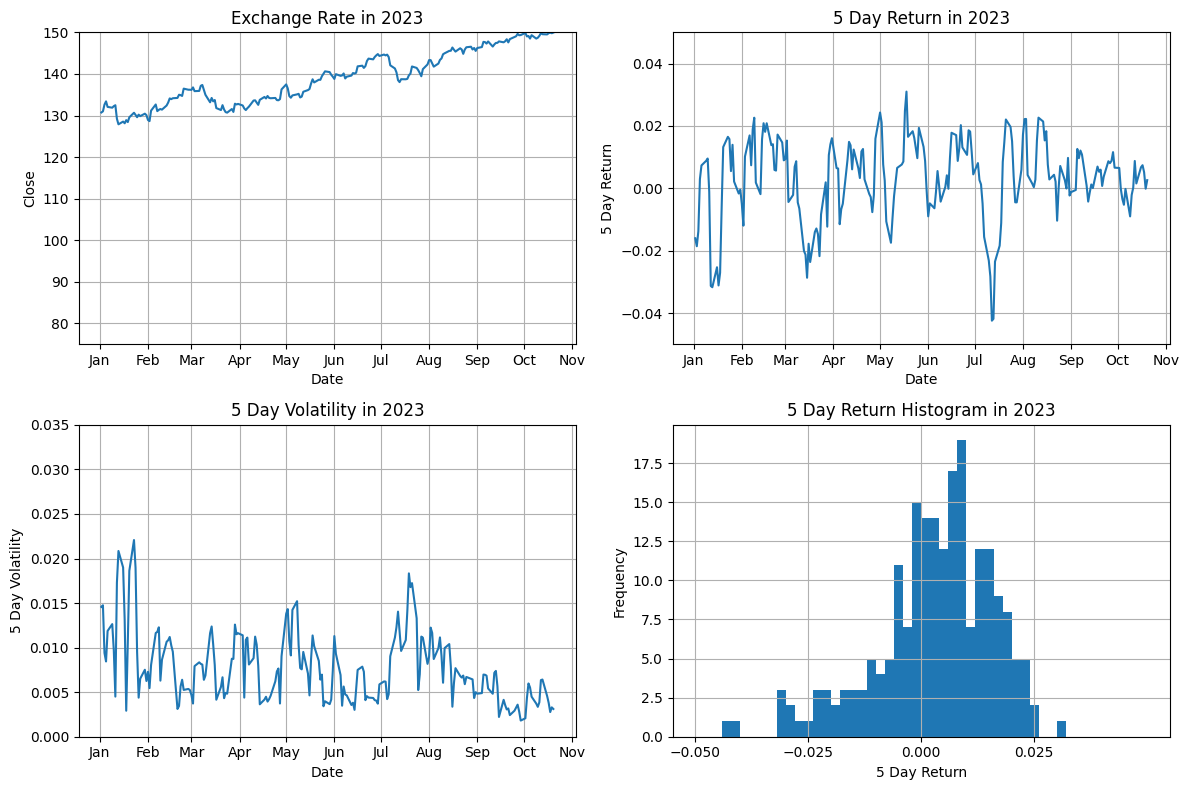

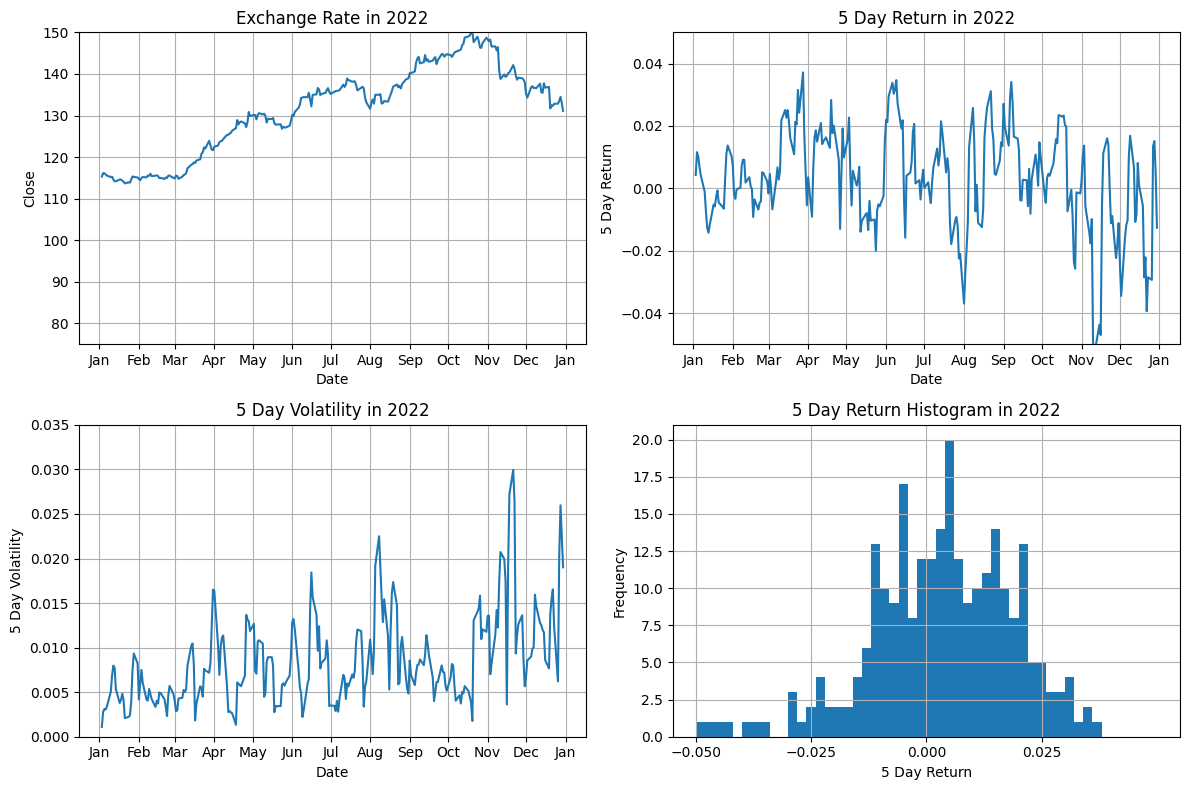

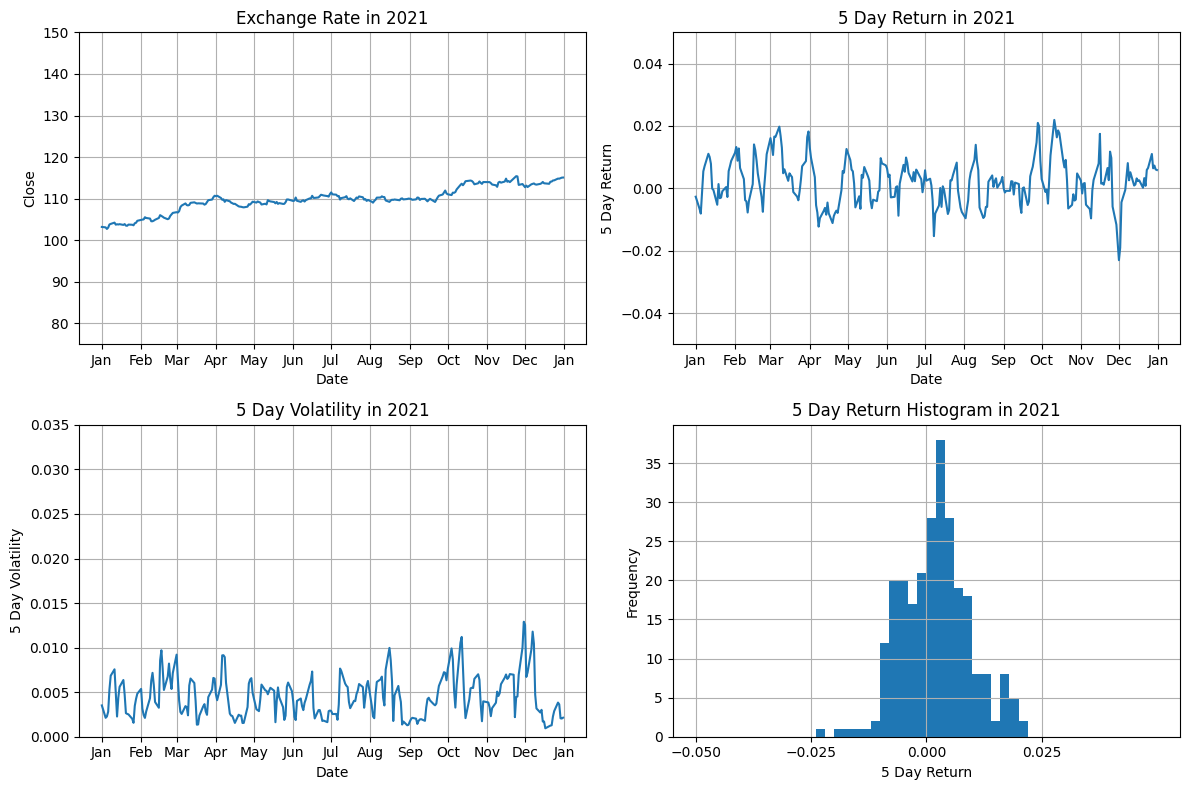

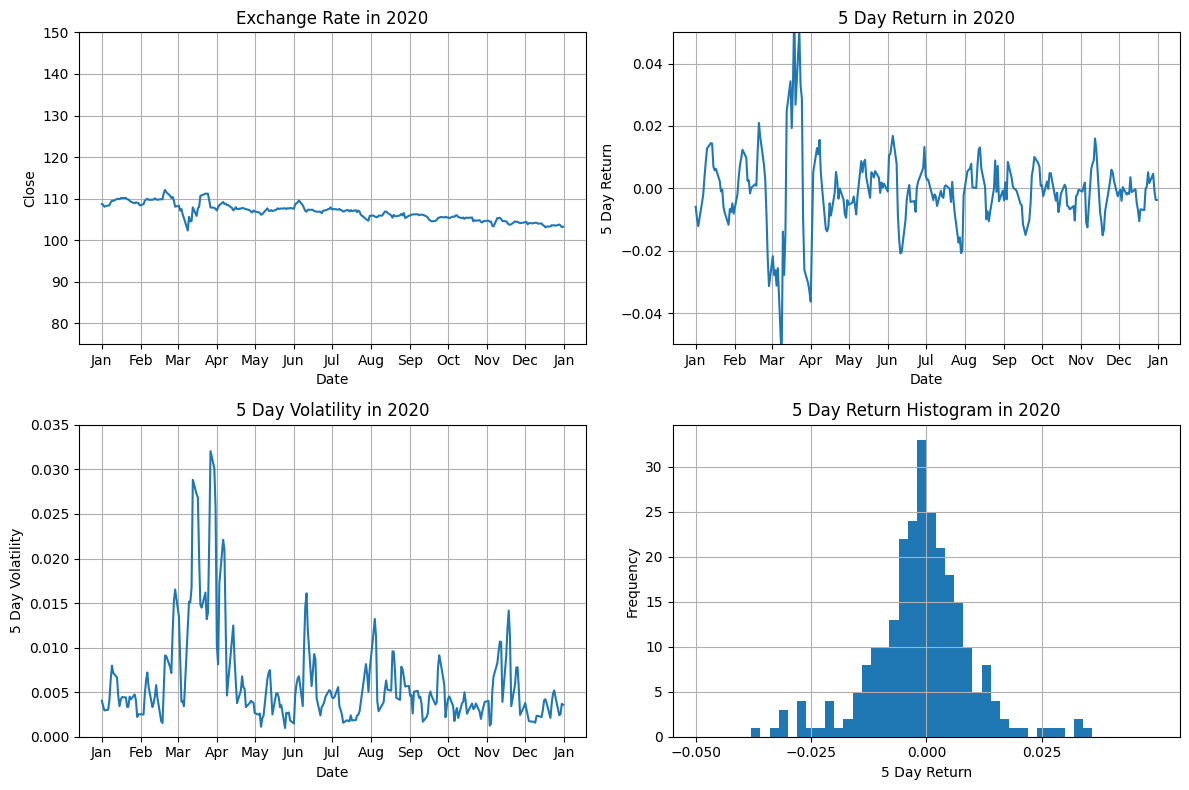

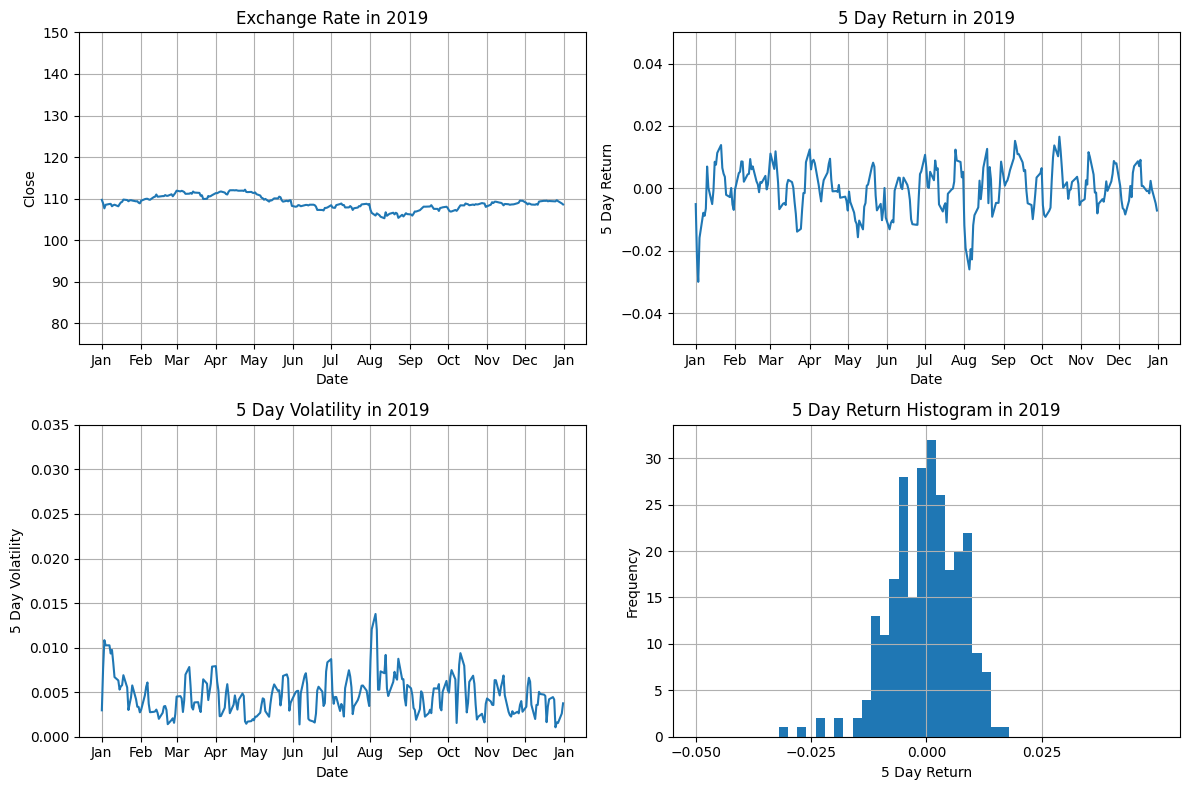

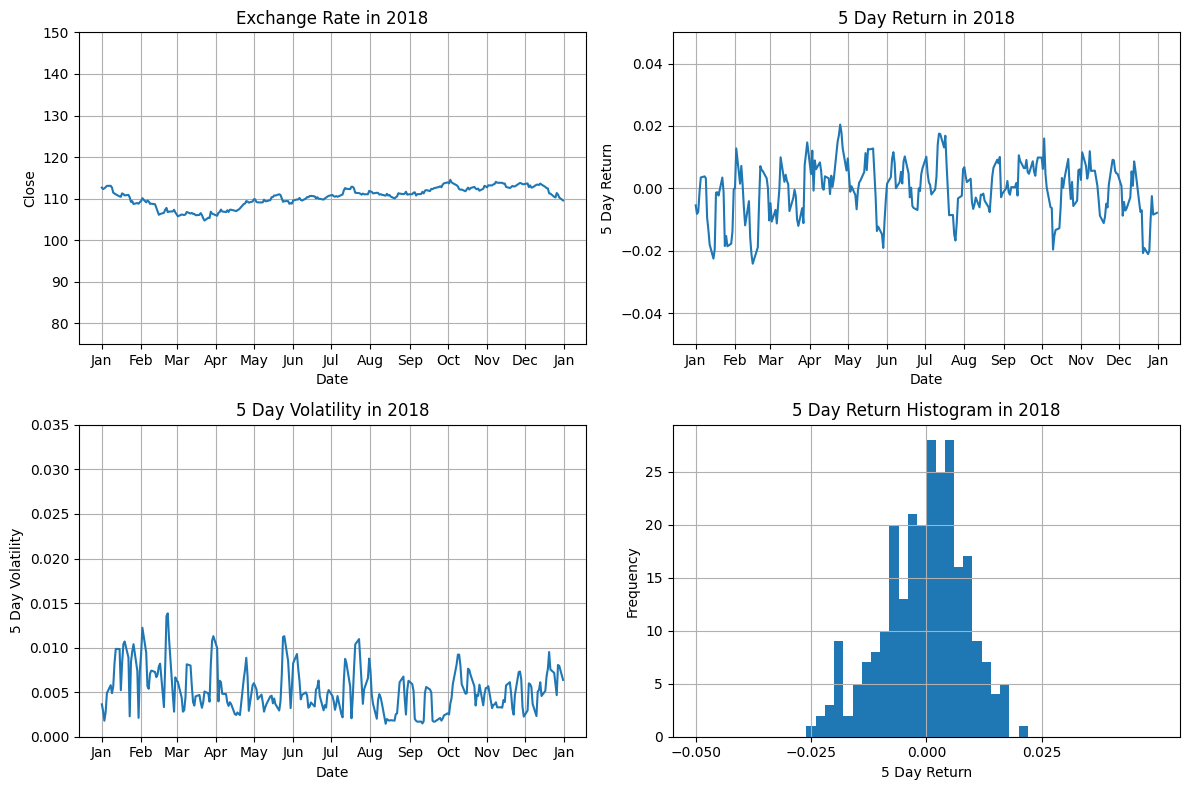

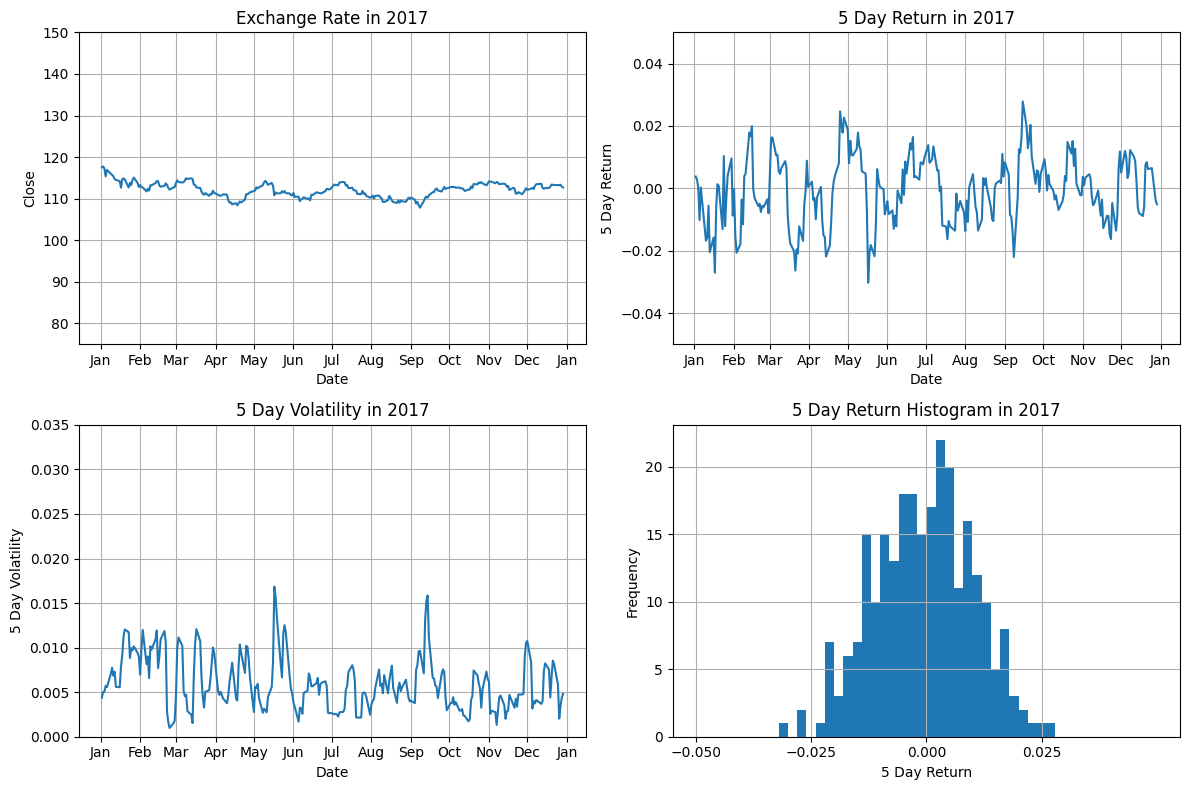

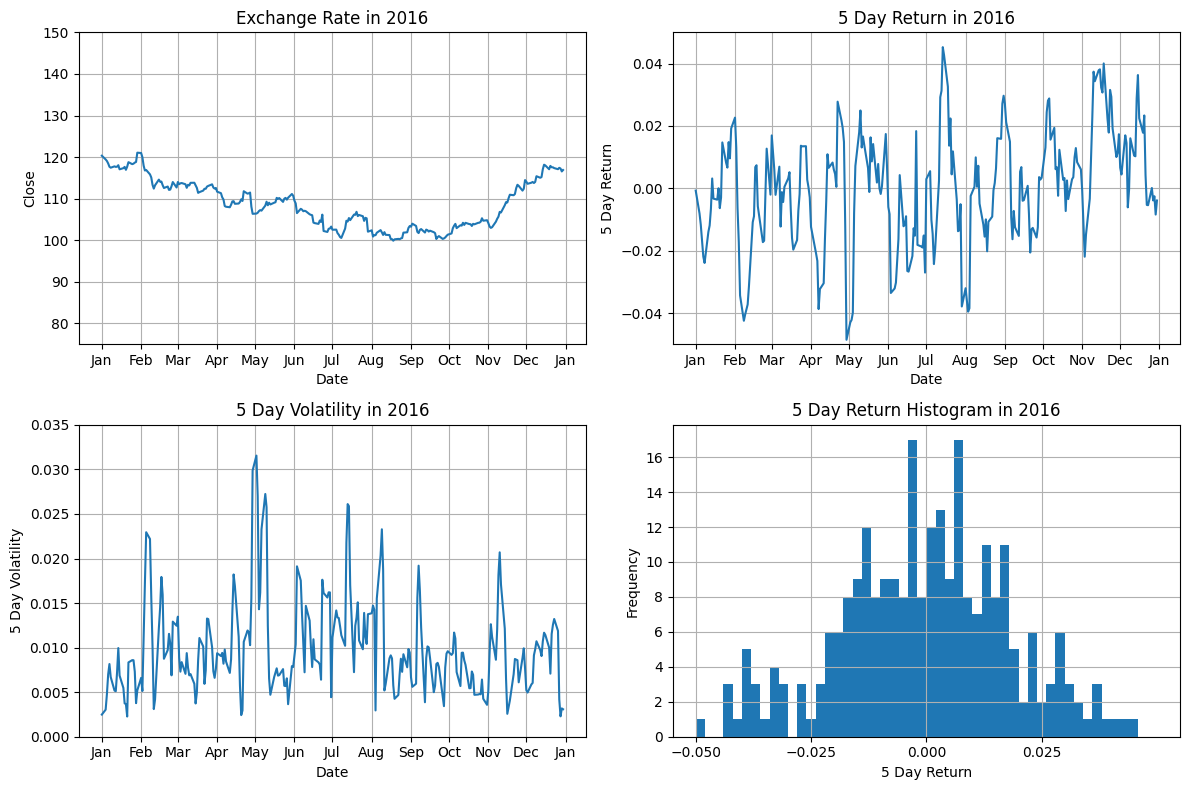

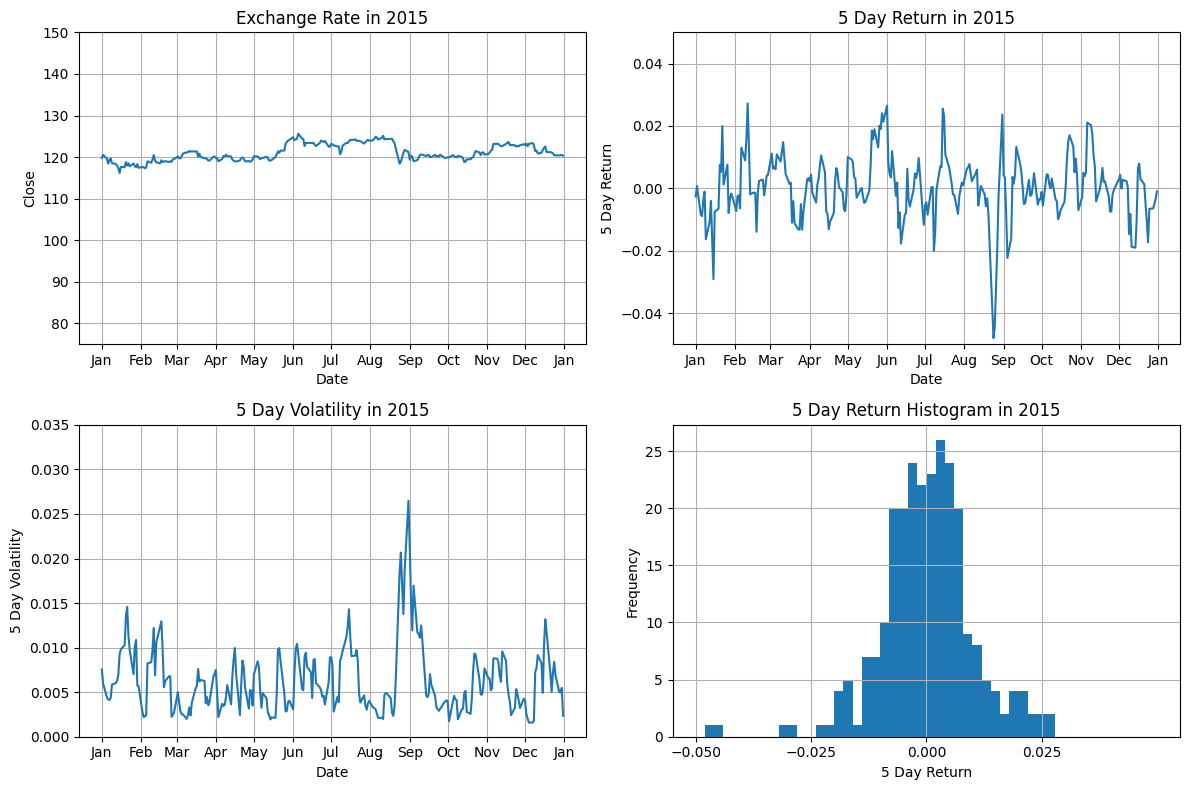

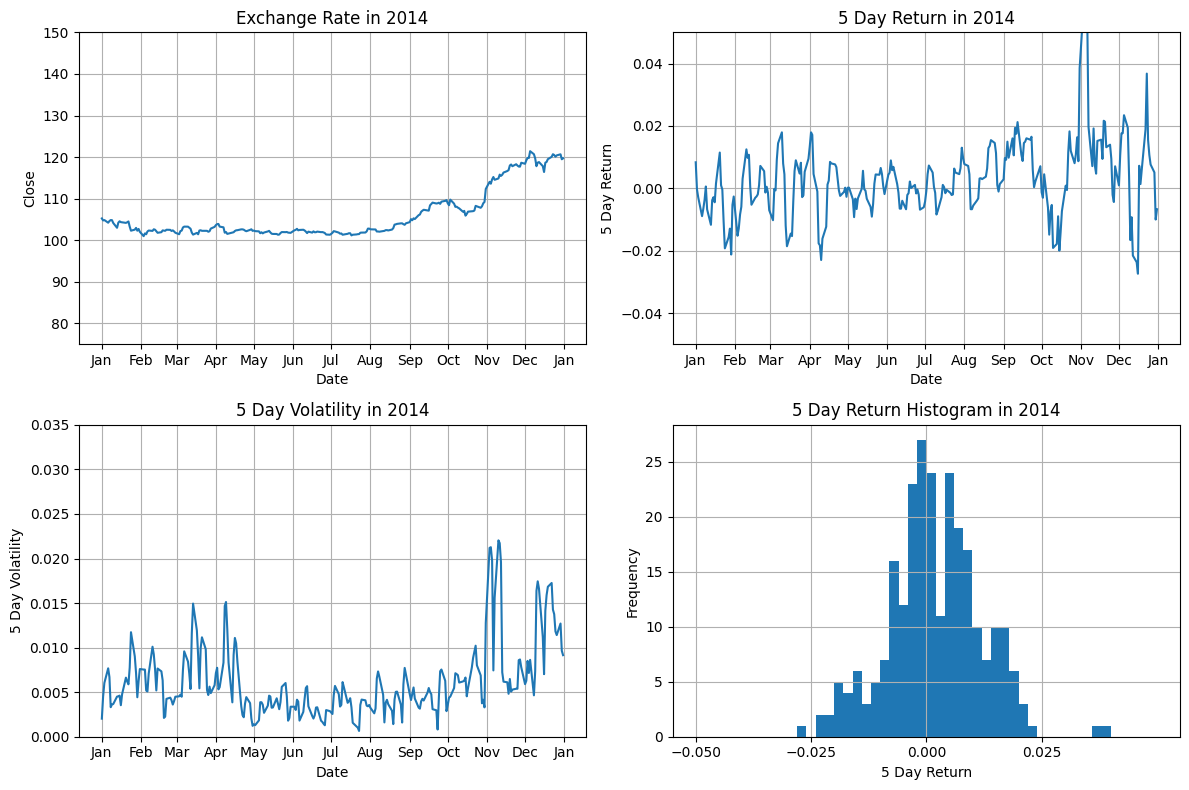

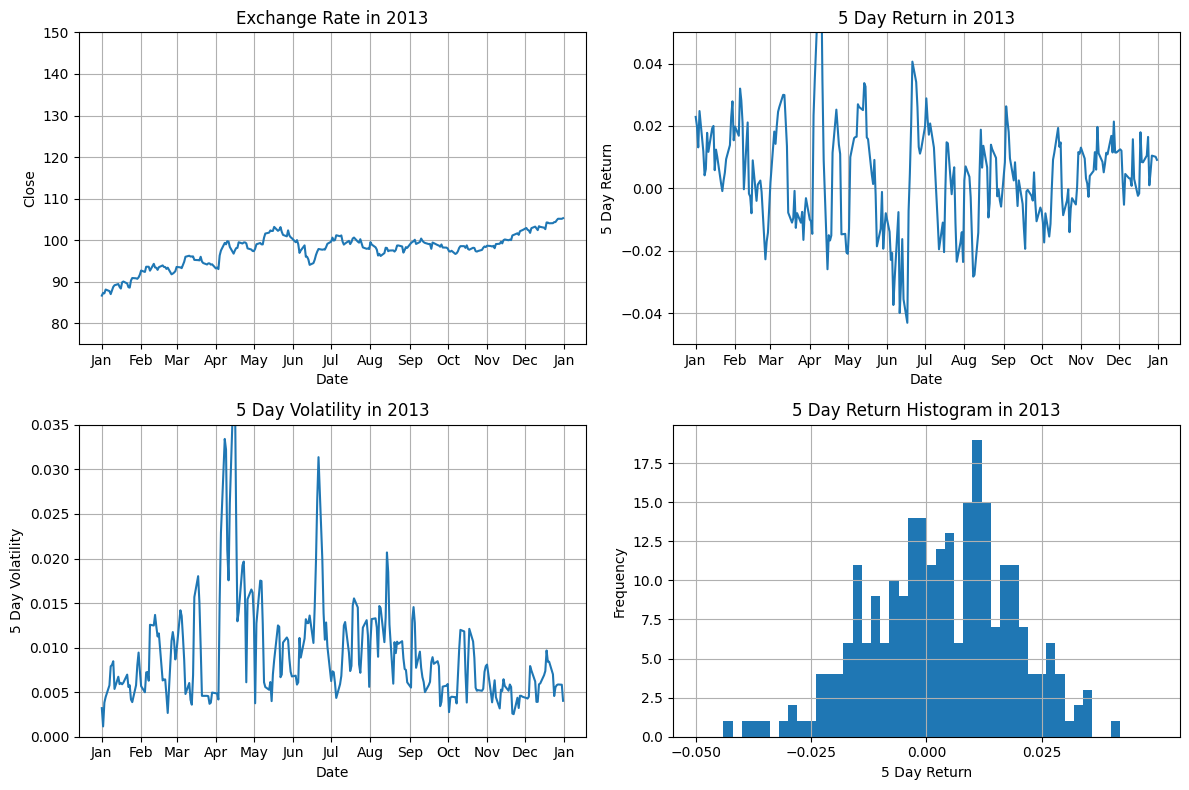

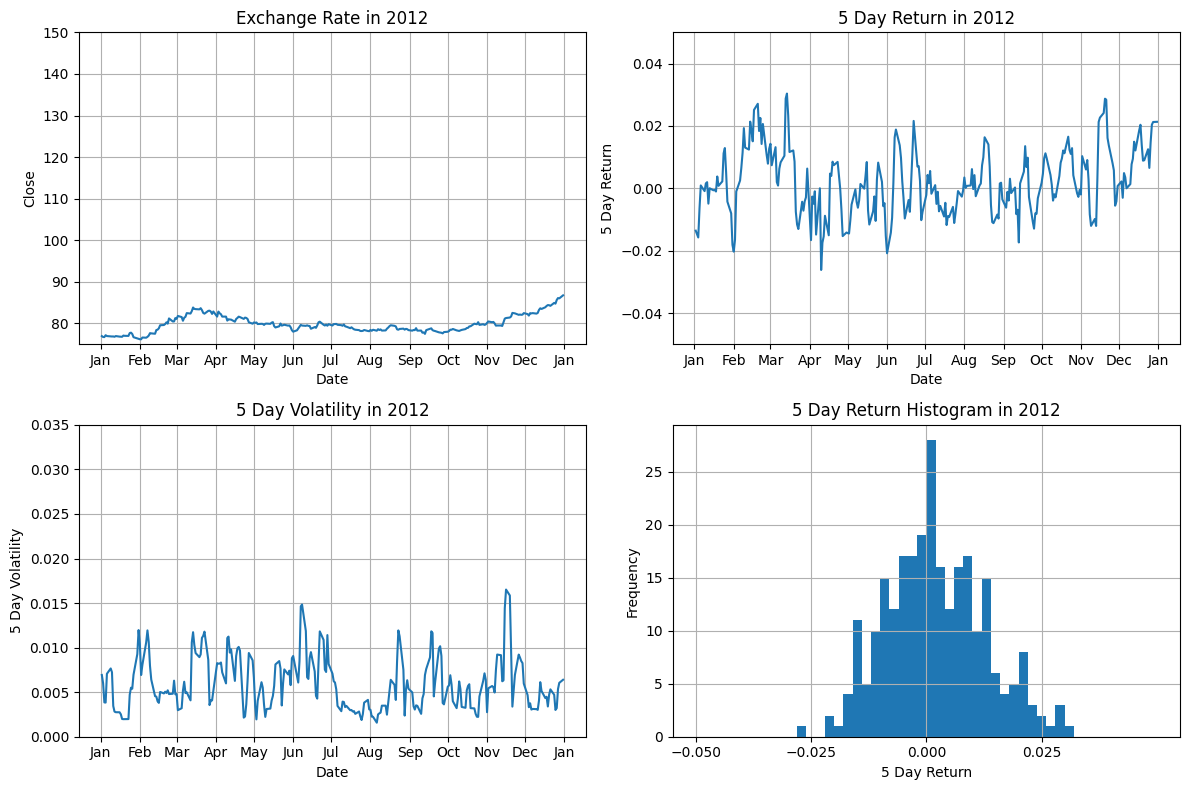

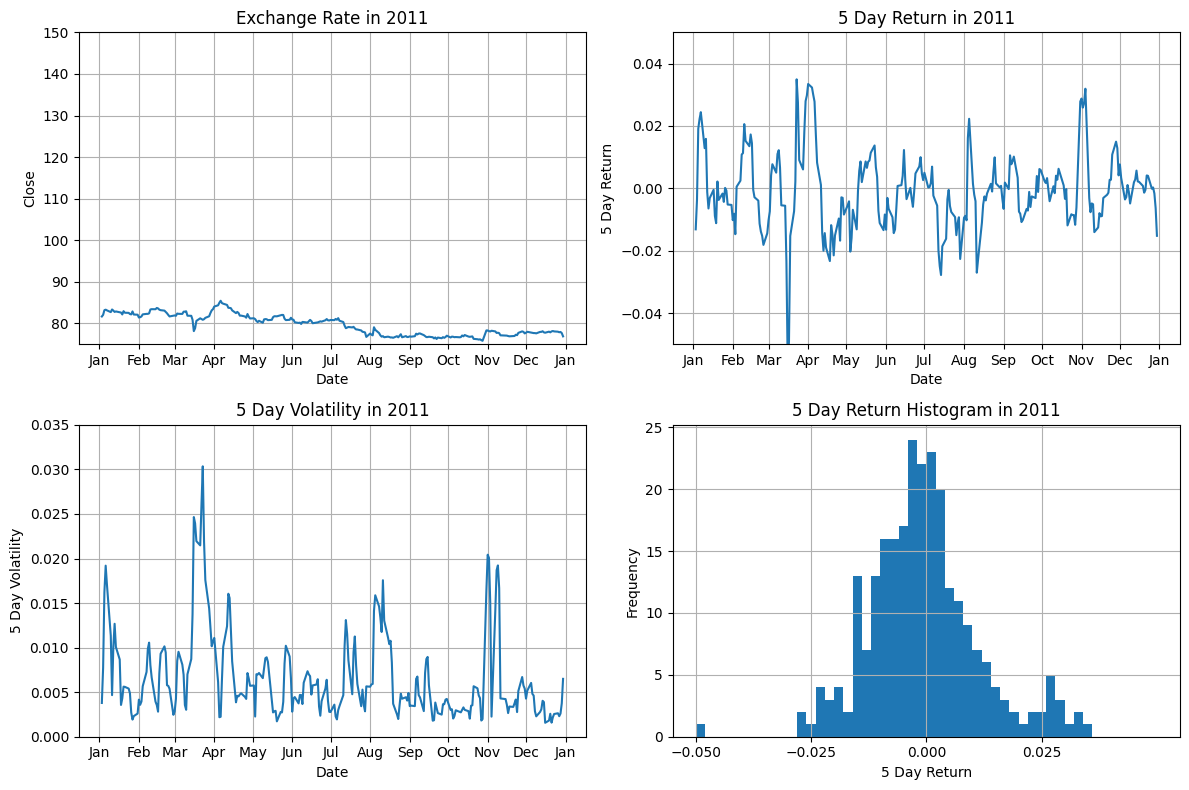

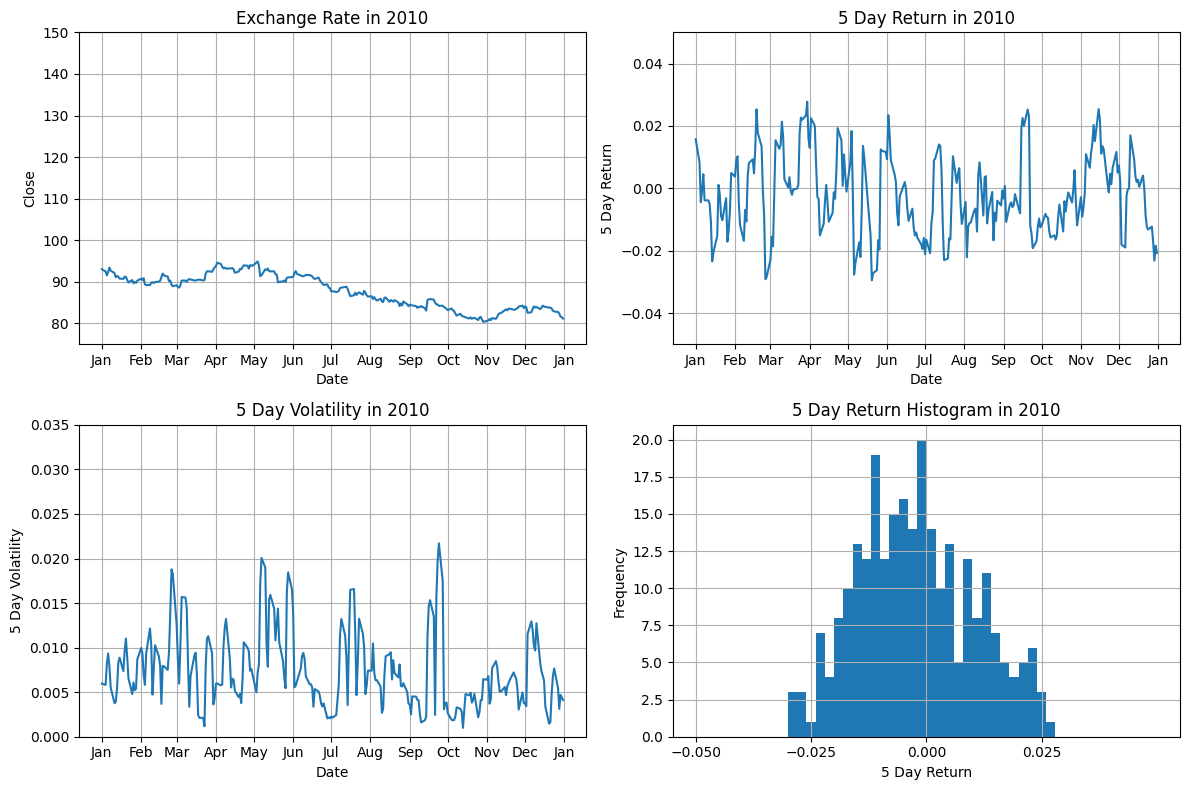

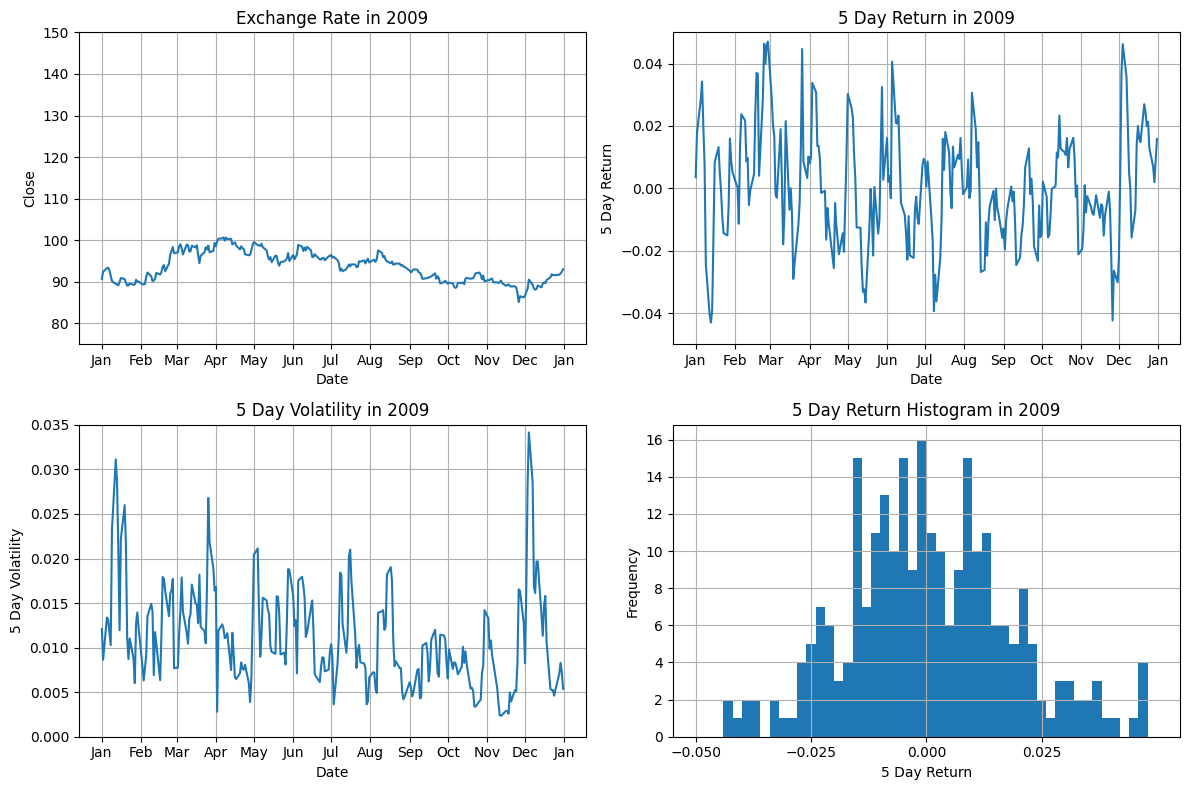

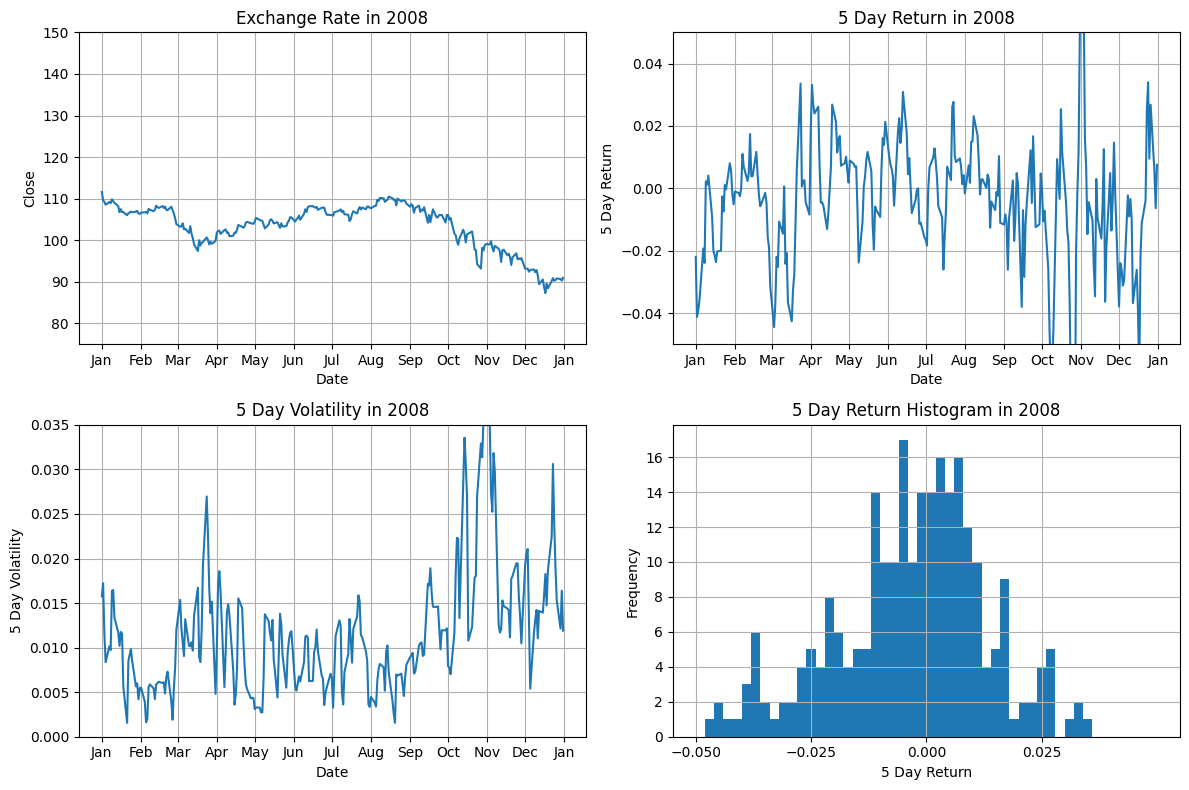

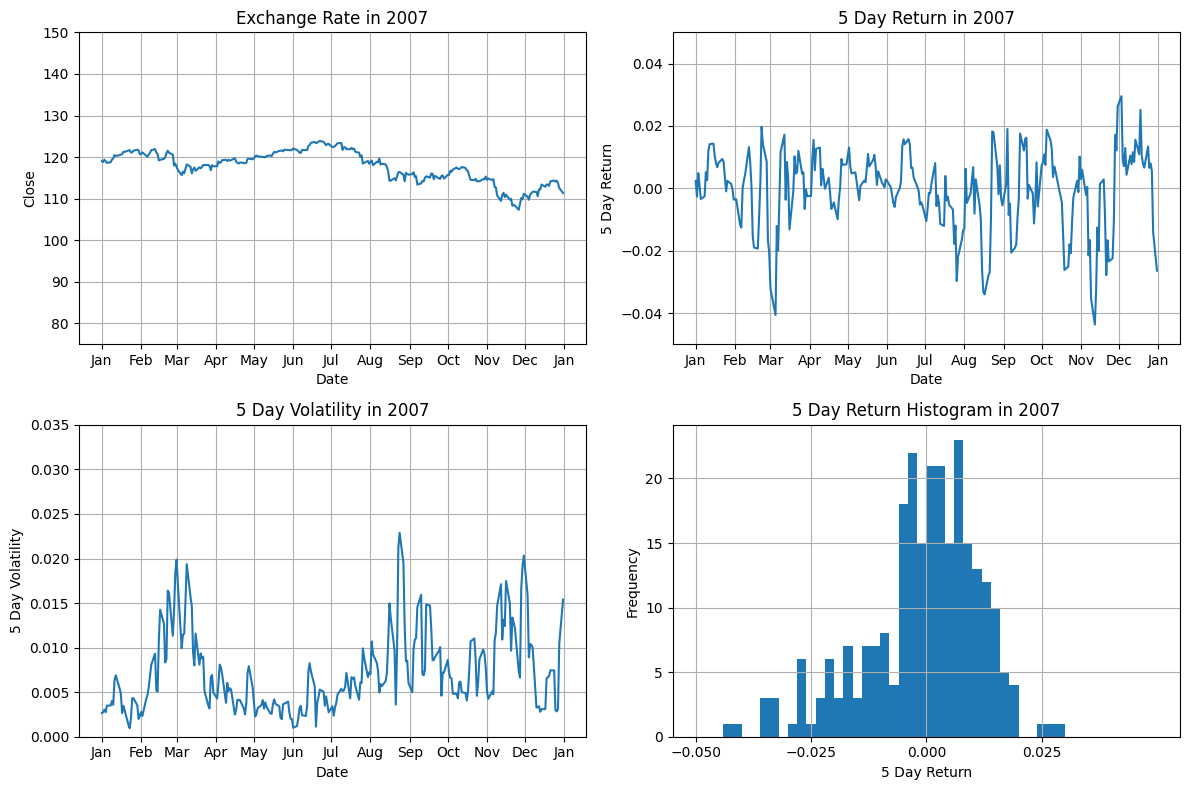

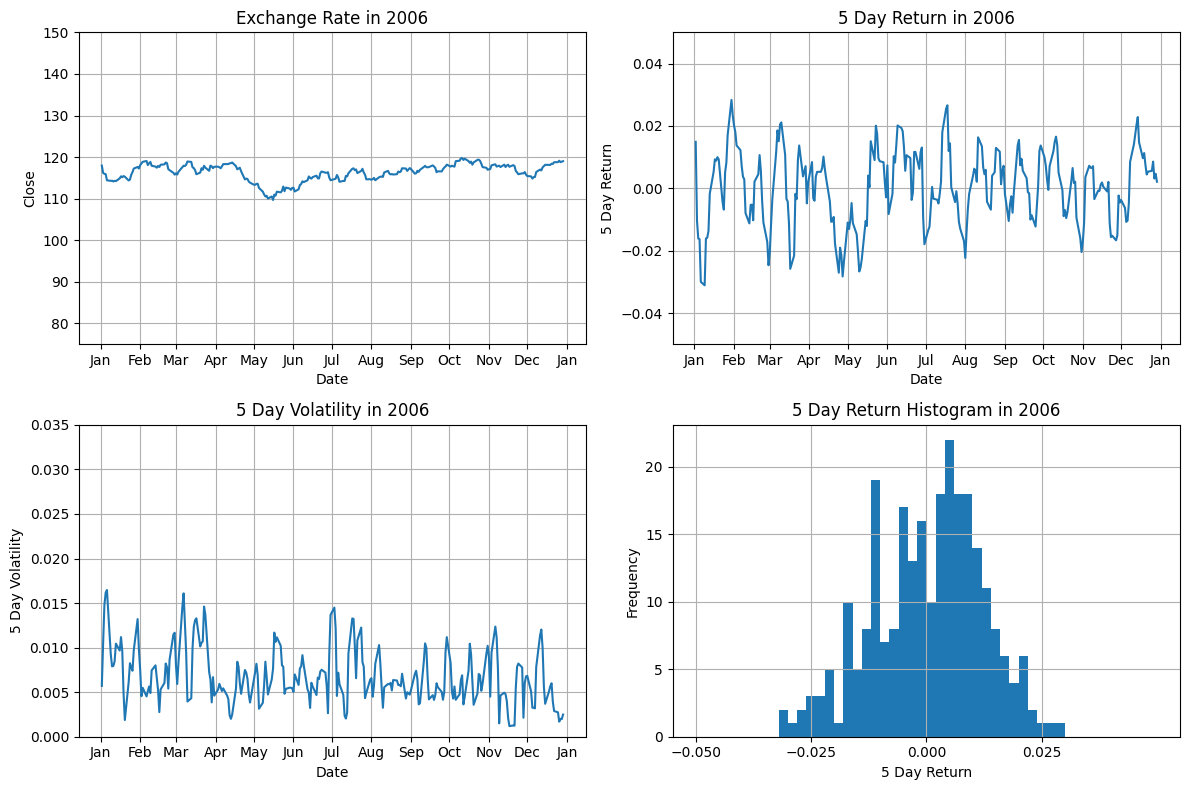

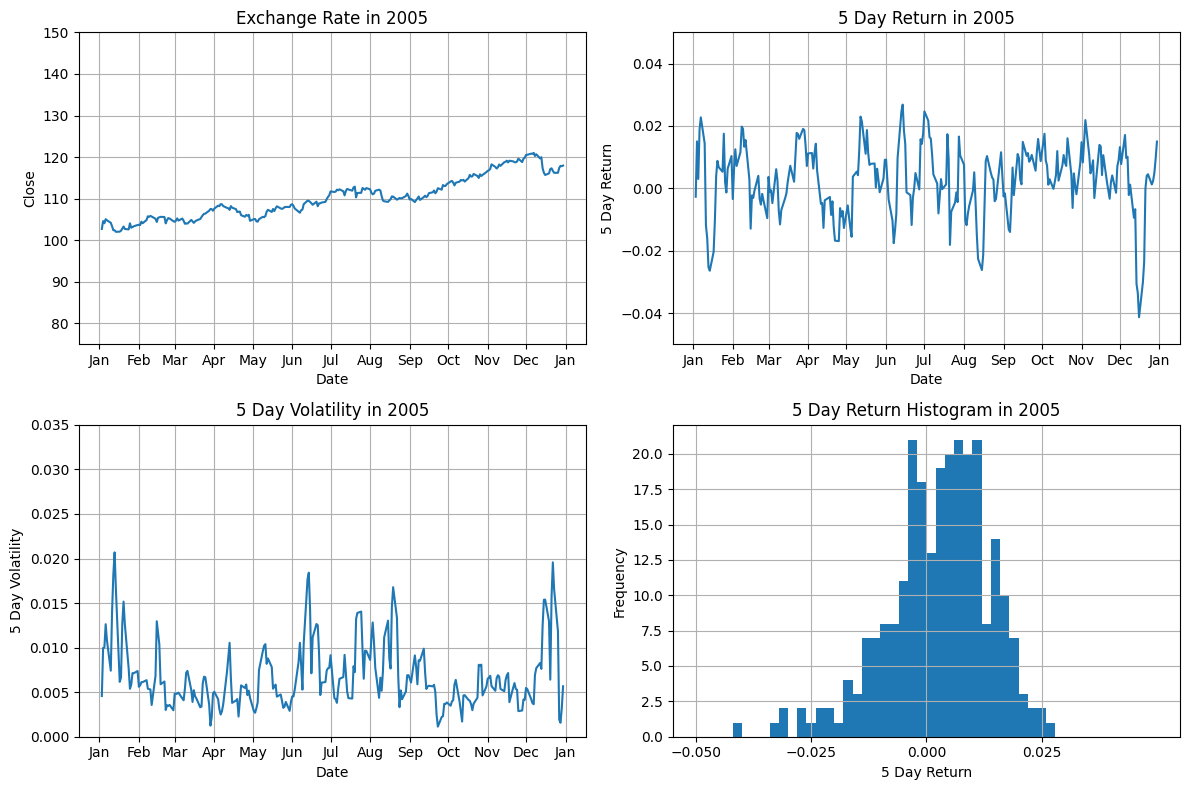

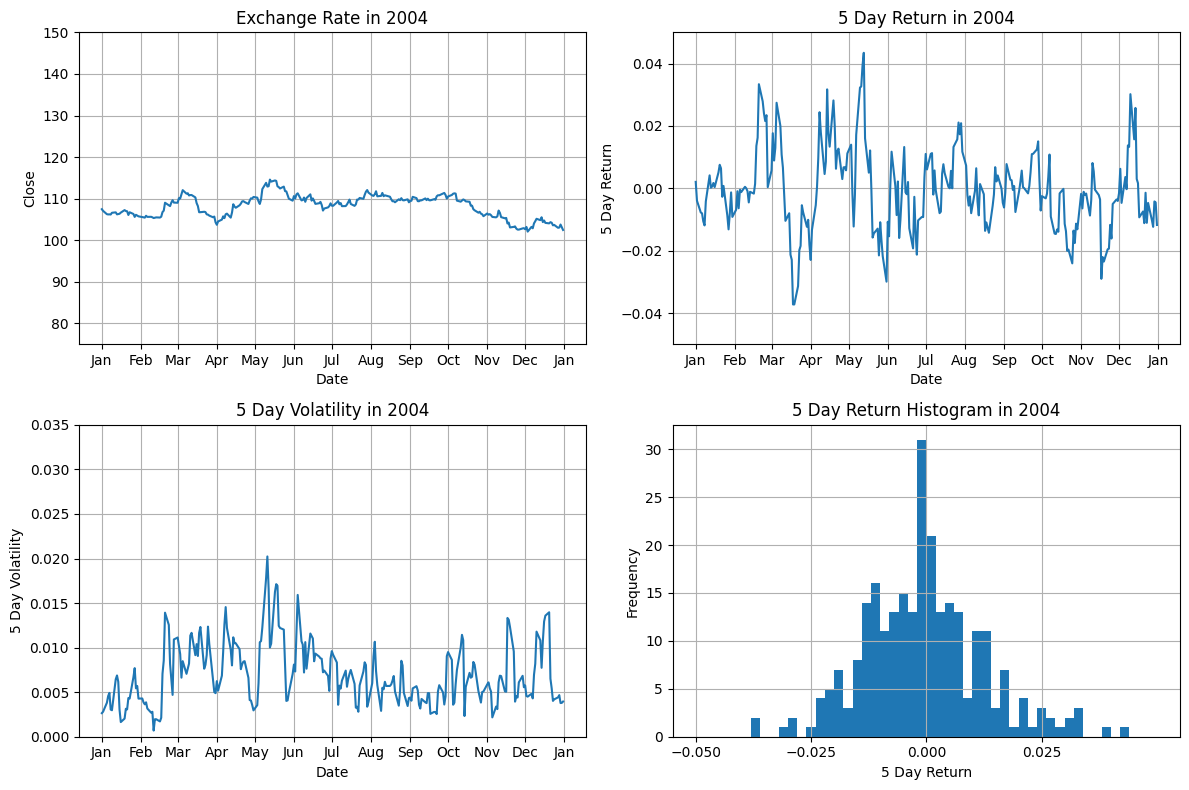

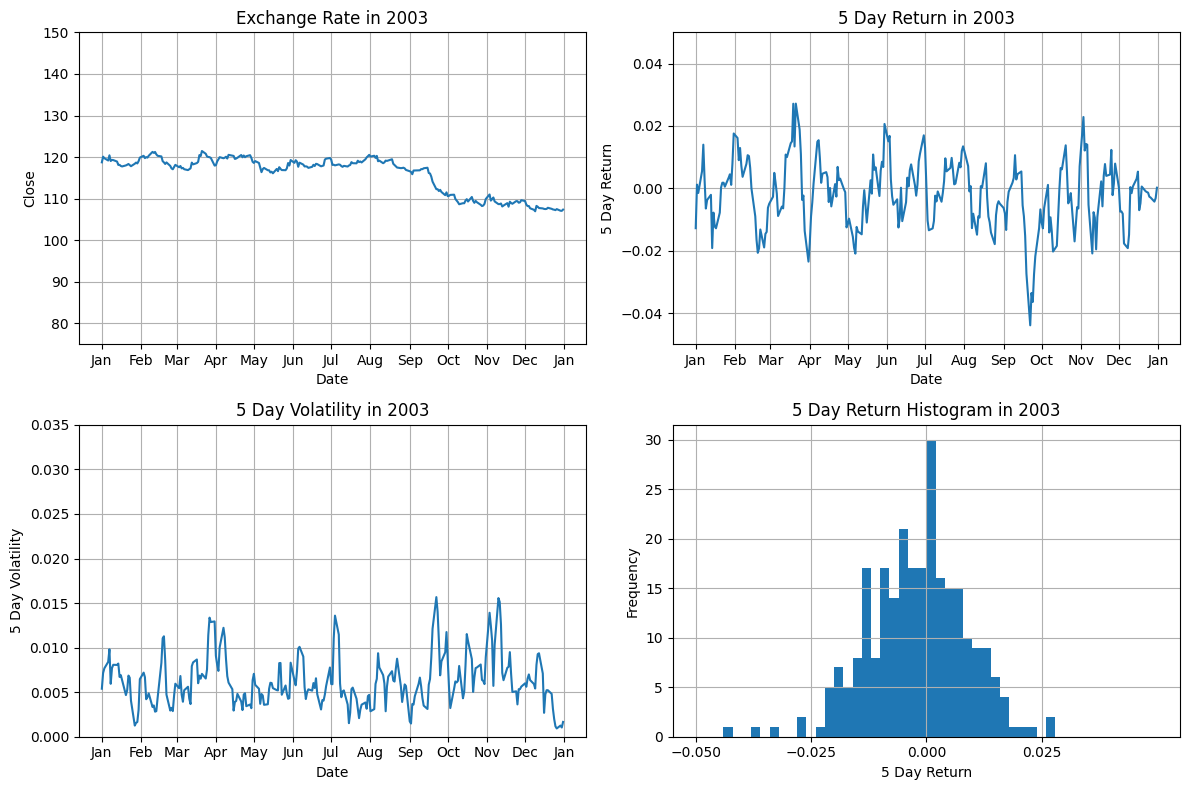

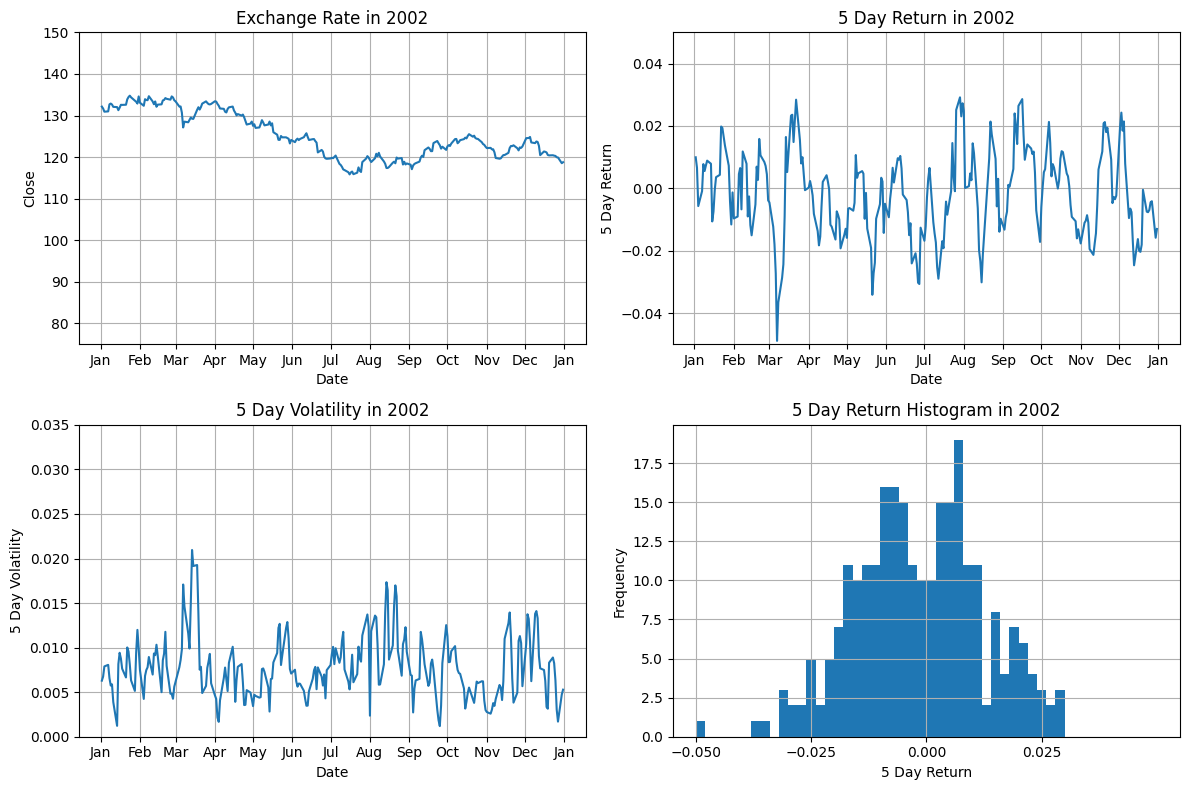

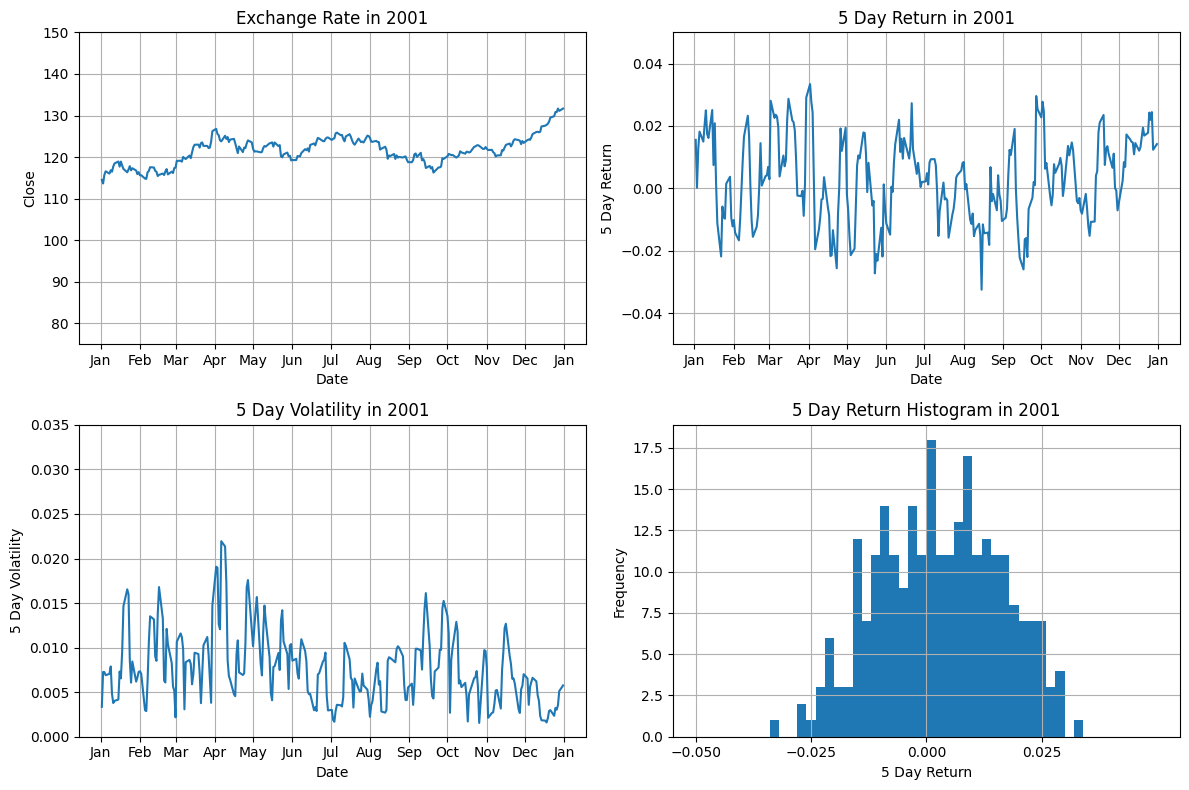

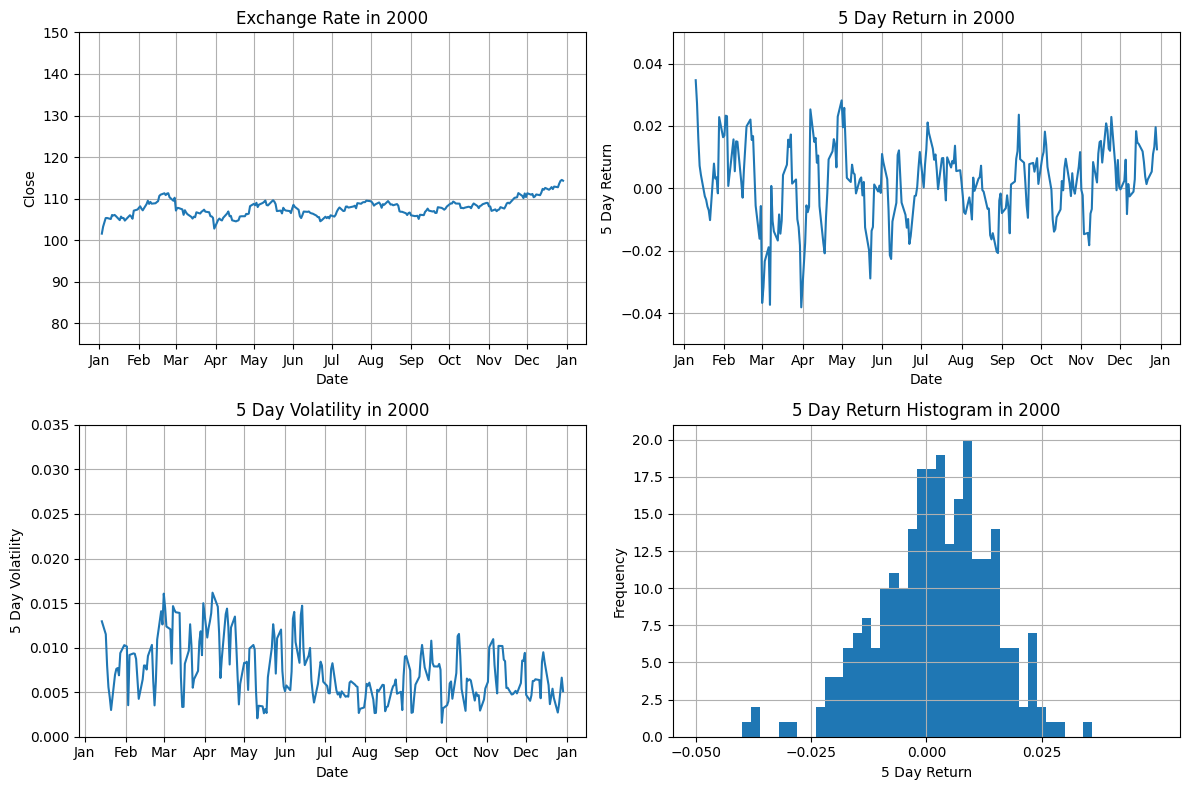

In [18]:
# 5日間リターン/ボラティリティでの分析

# 5日間リターン
return_days = 5

# 5日間ボラティリティ
volatility_days = 5

# fx return とvolatilityの計算
calculate_and_plot_return_volatility(dir_path, csv_file_name, return_days, volatility_days)


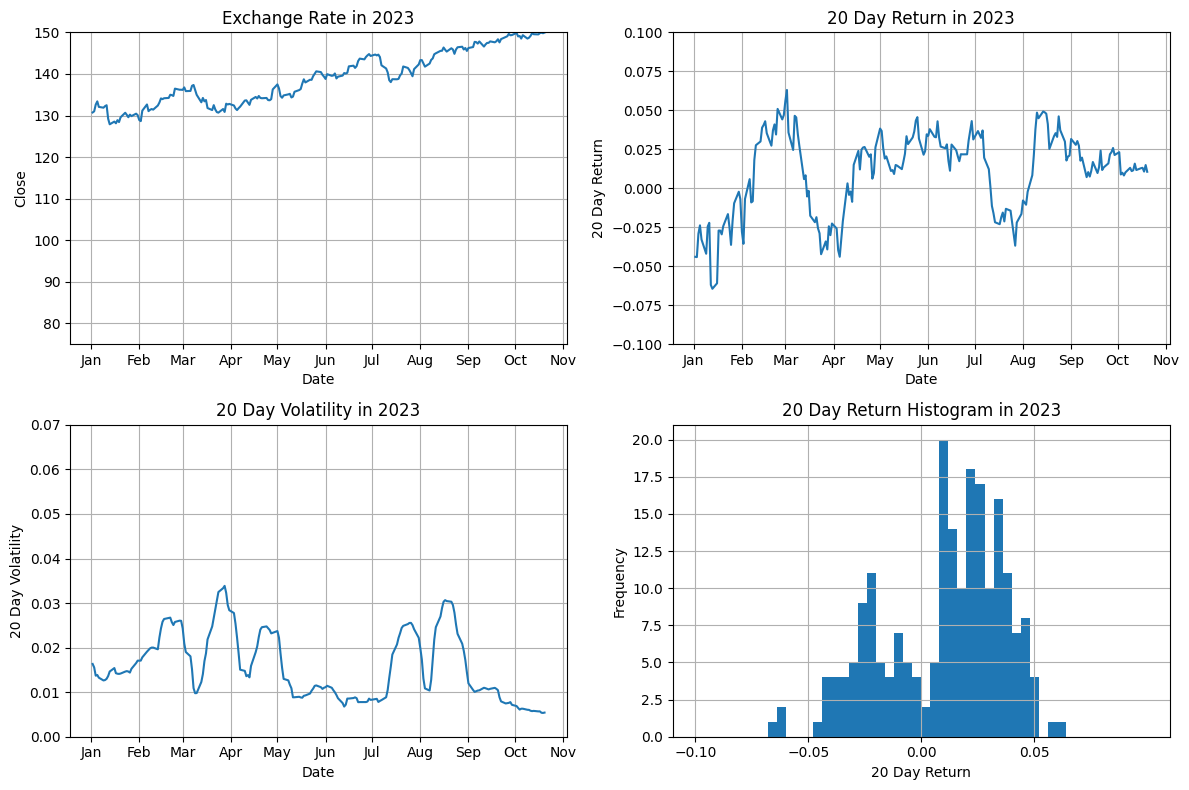

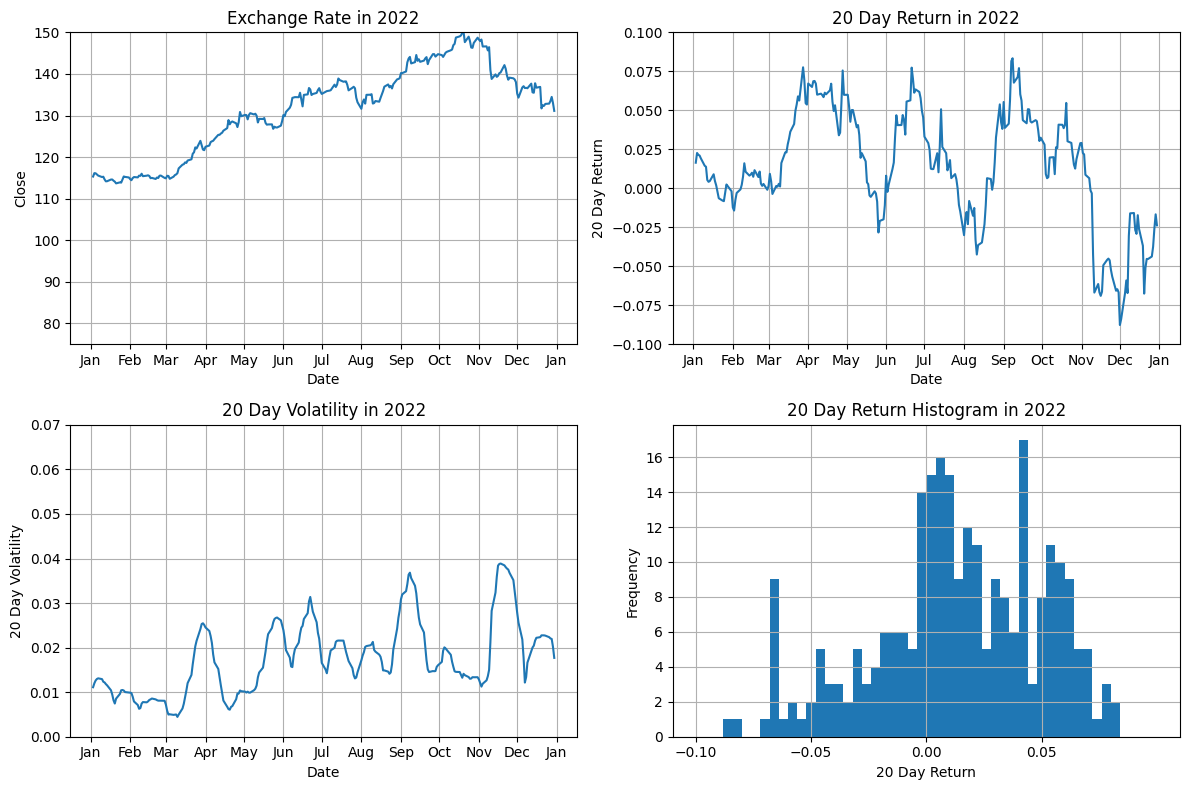

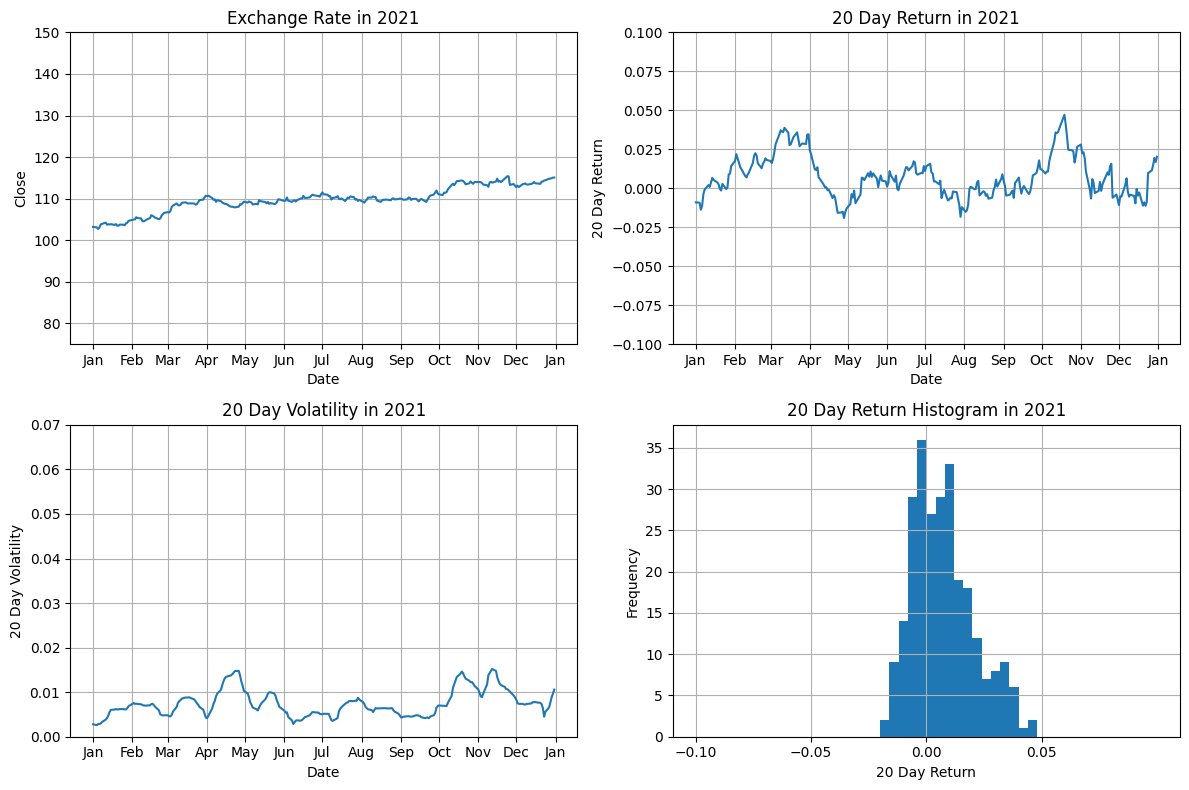

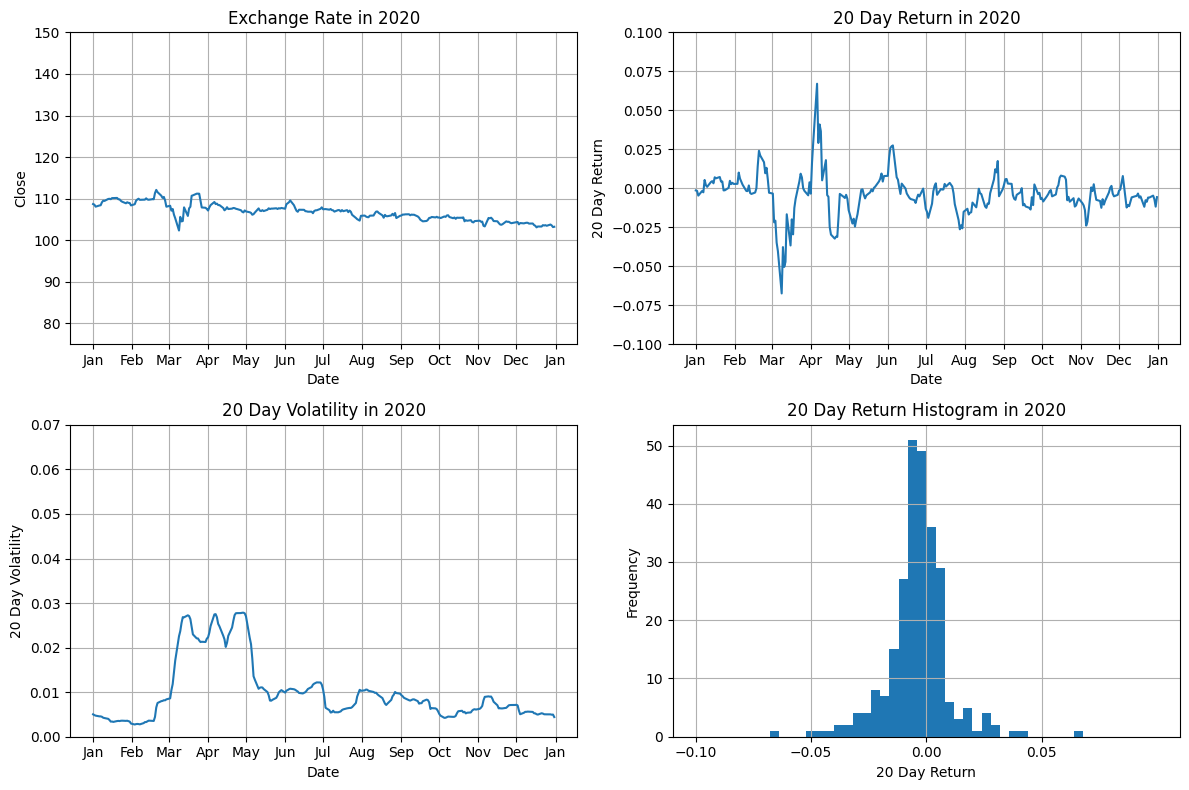

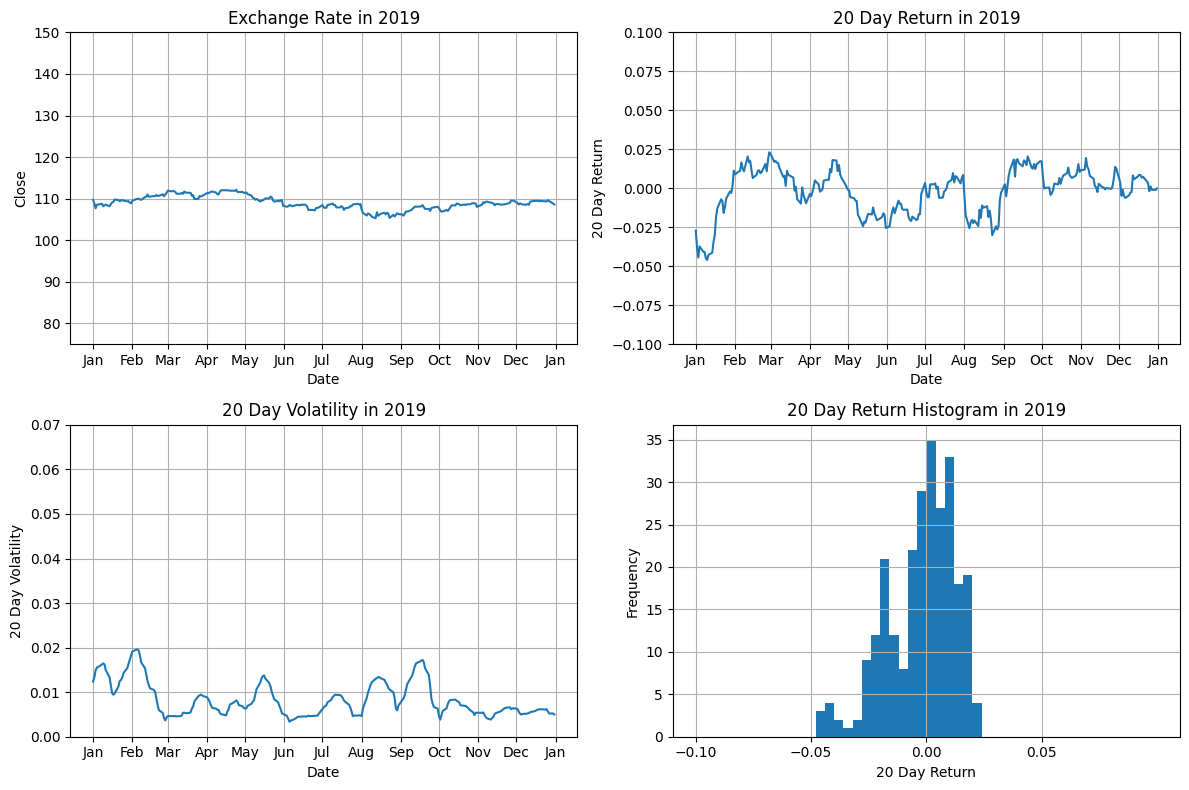

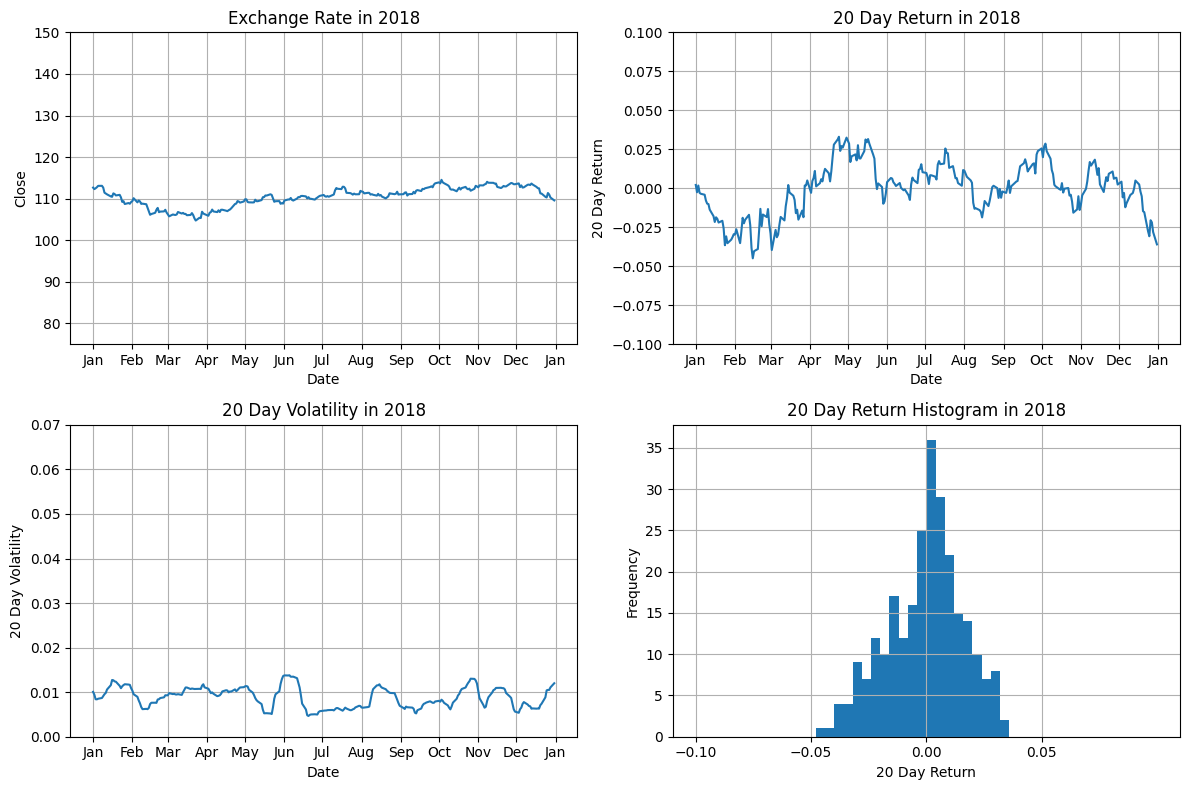

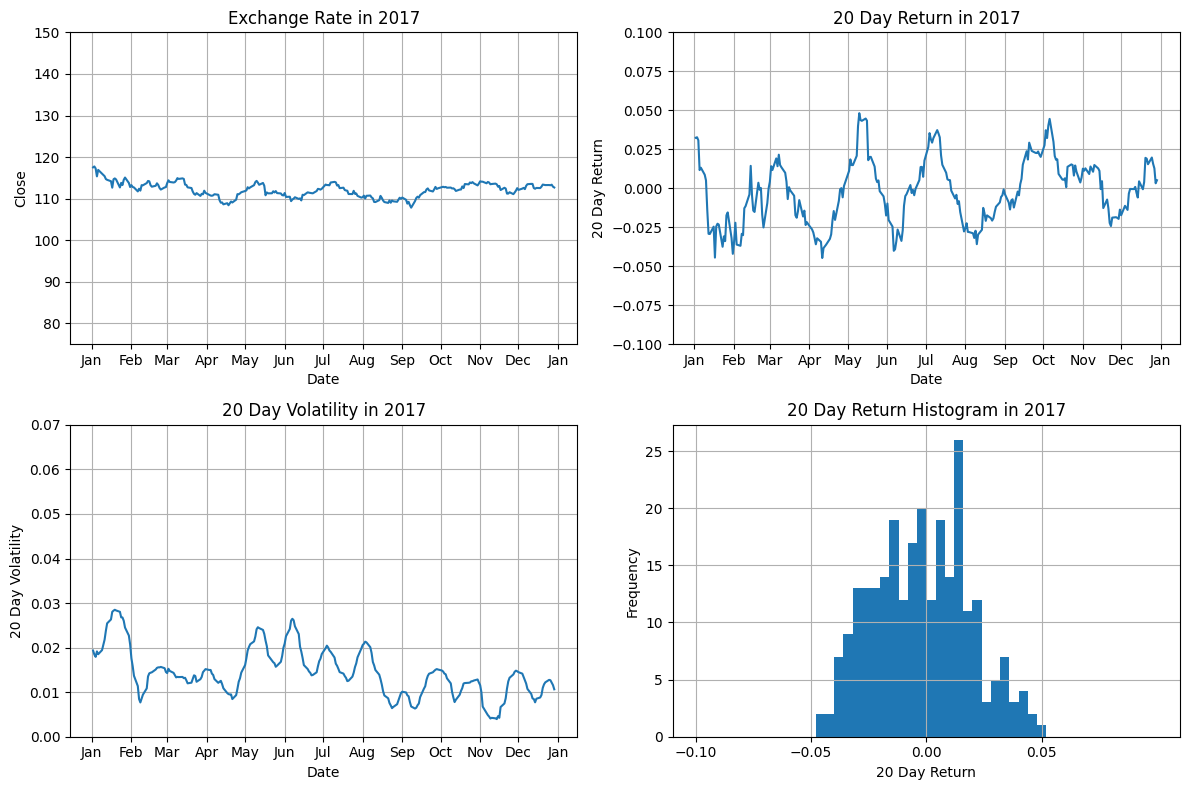

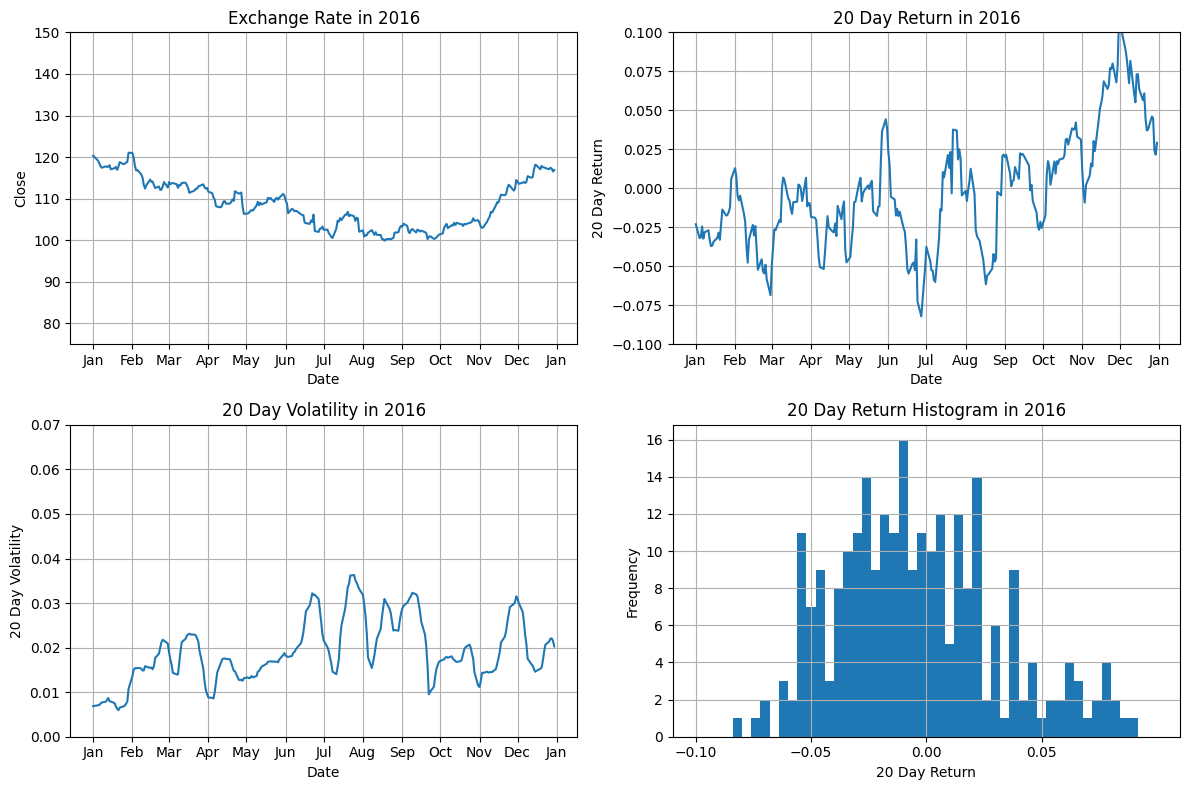

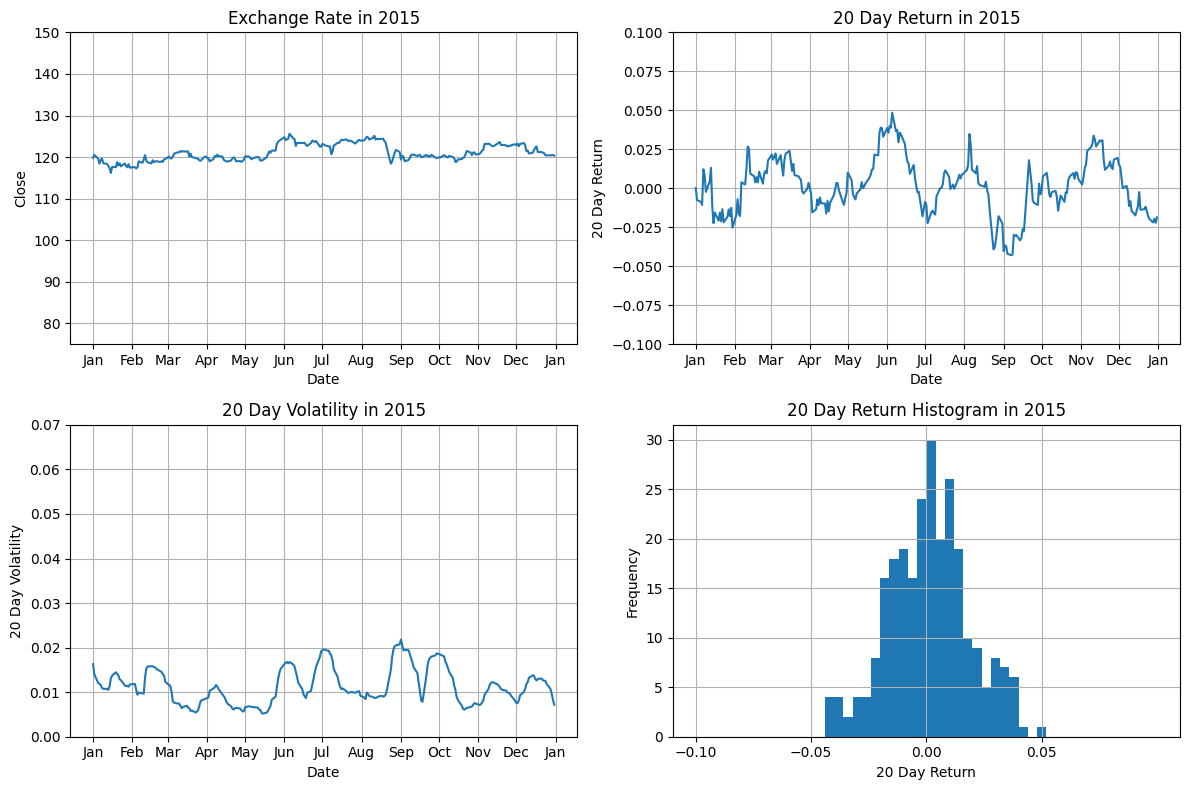

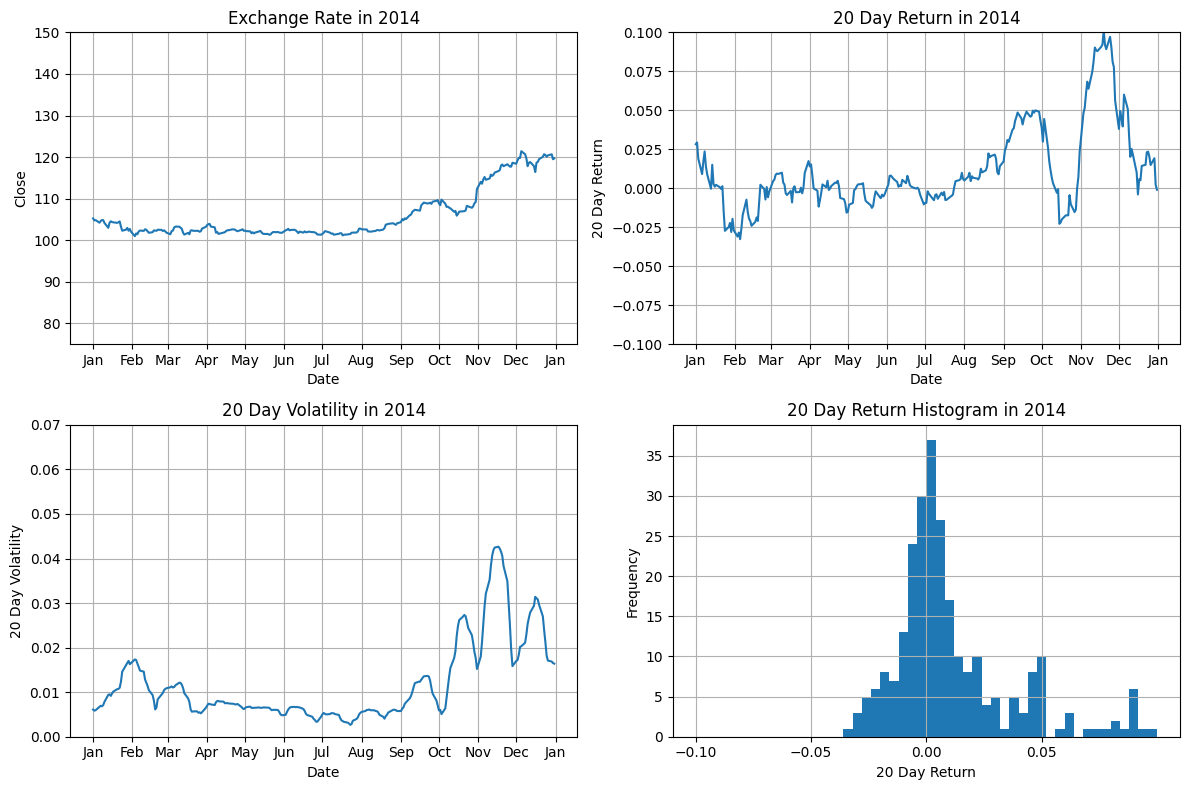

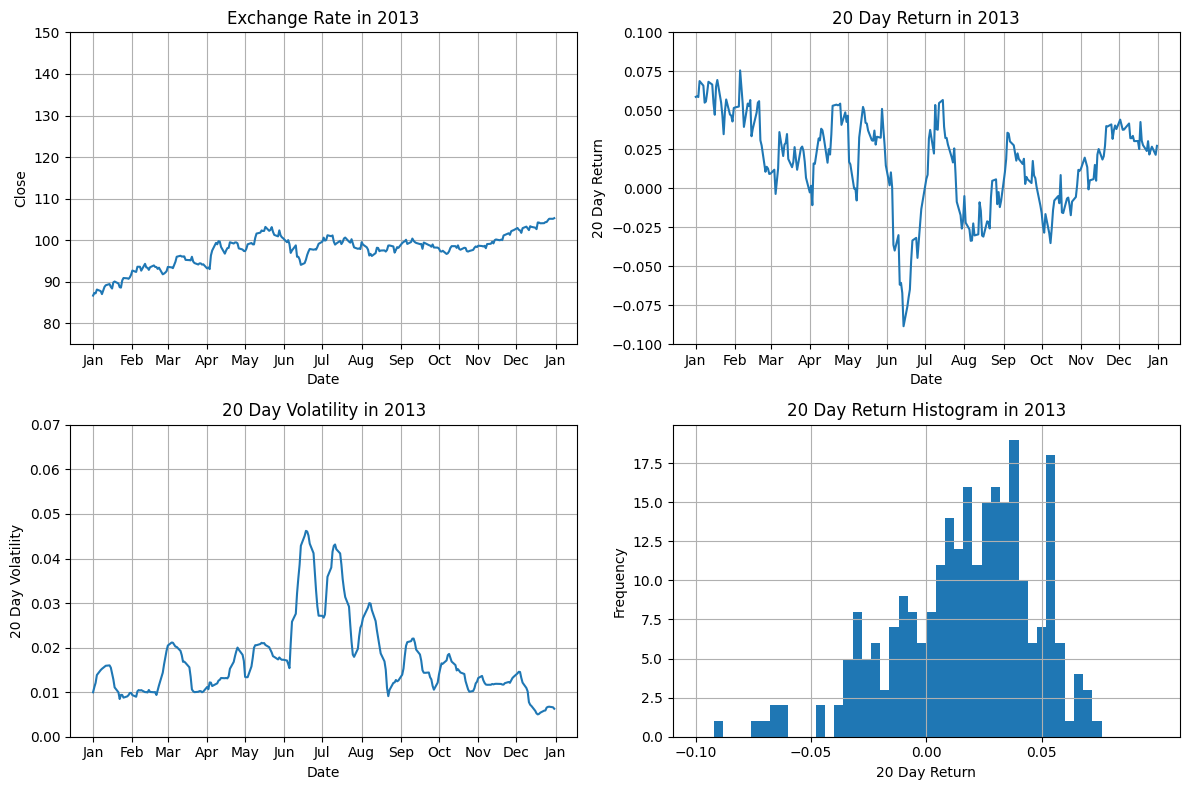

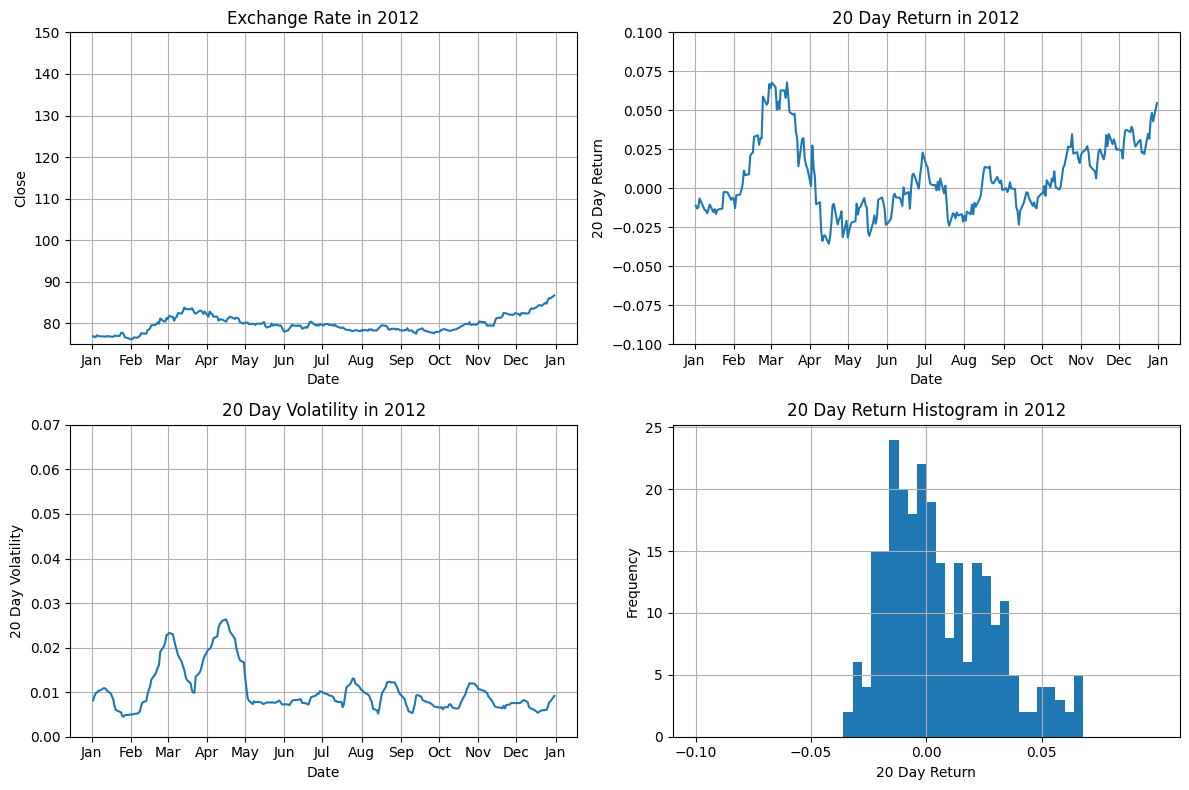

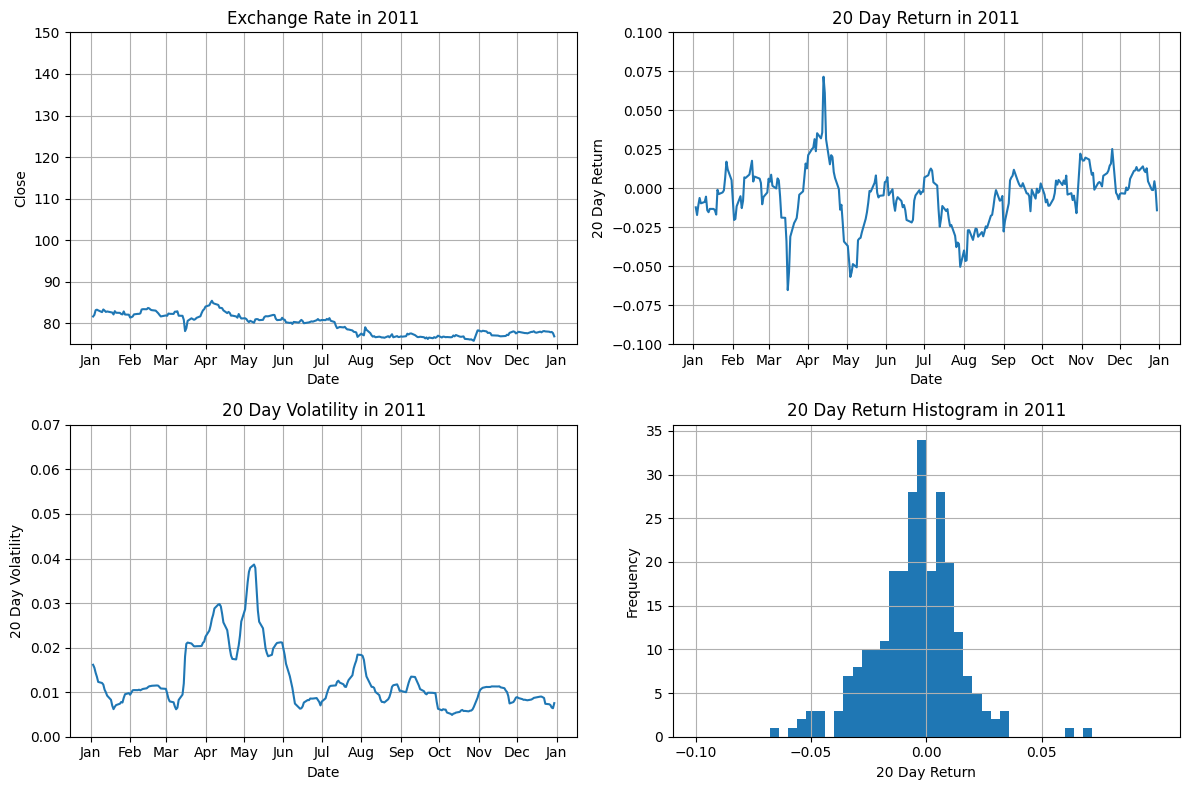

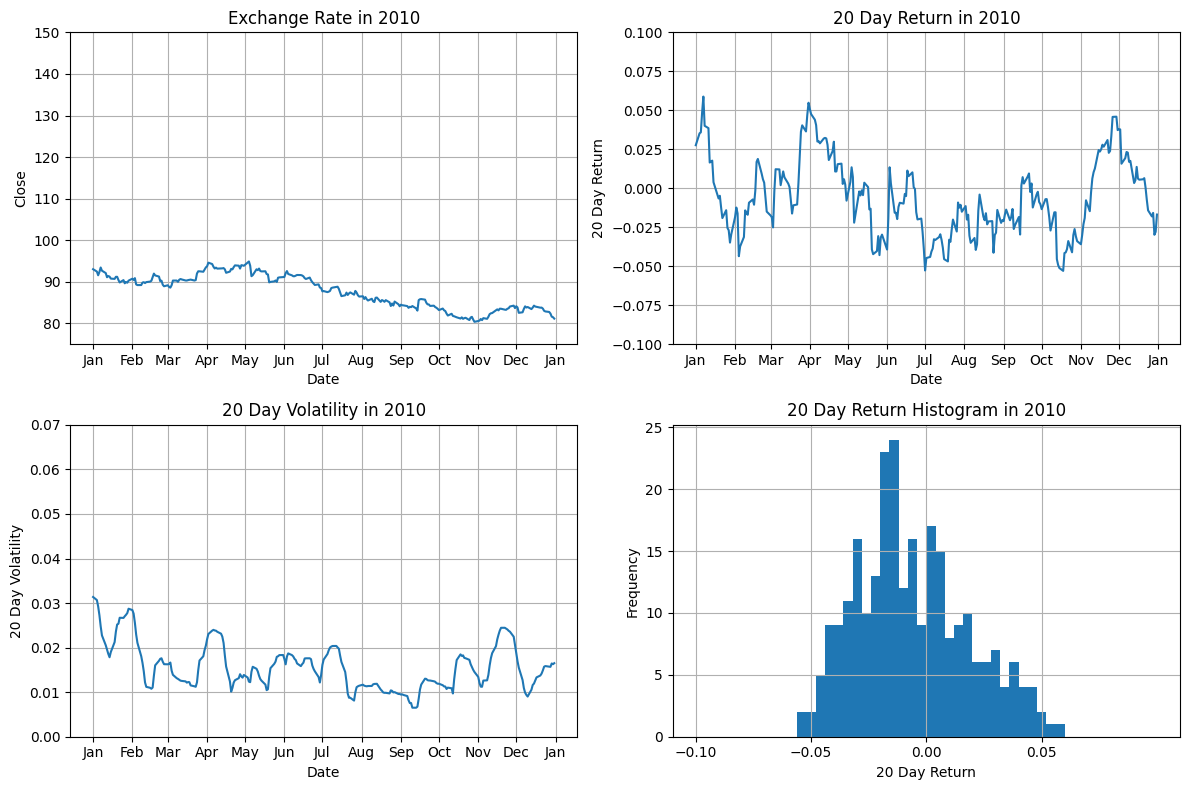

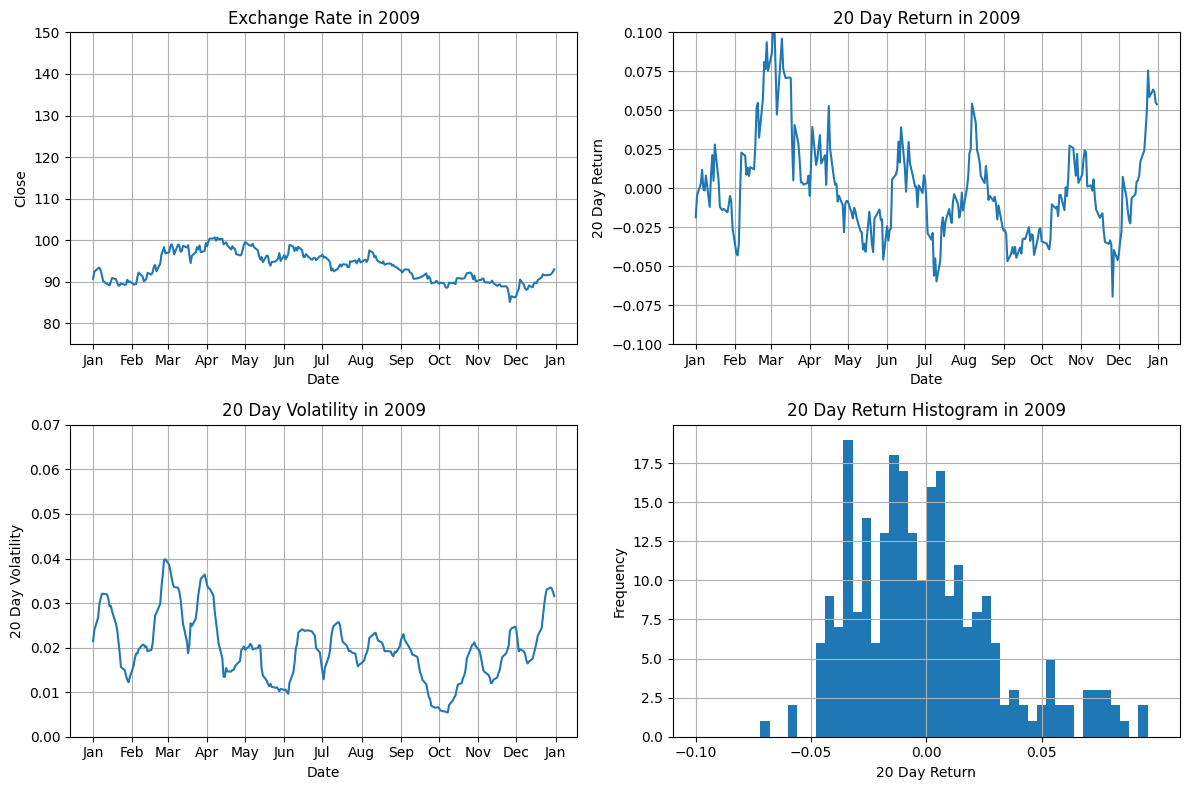

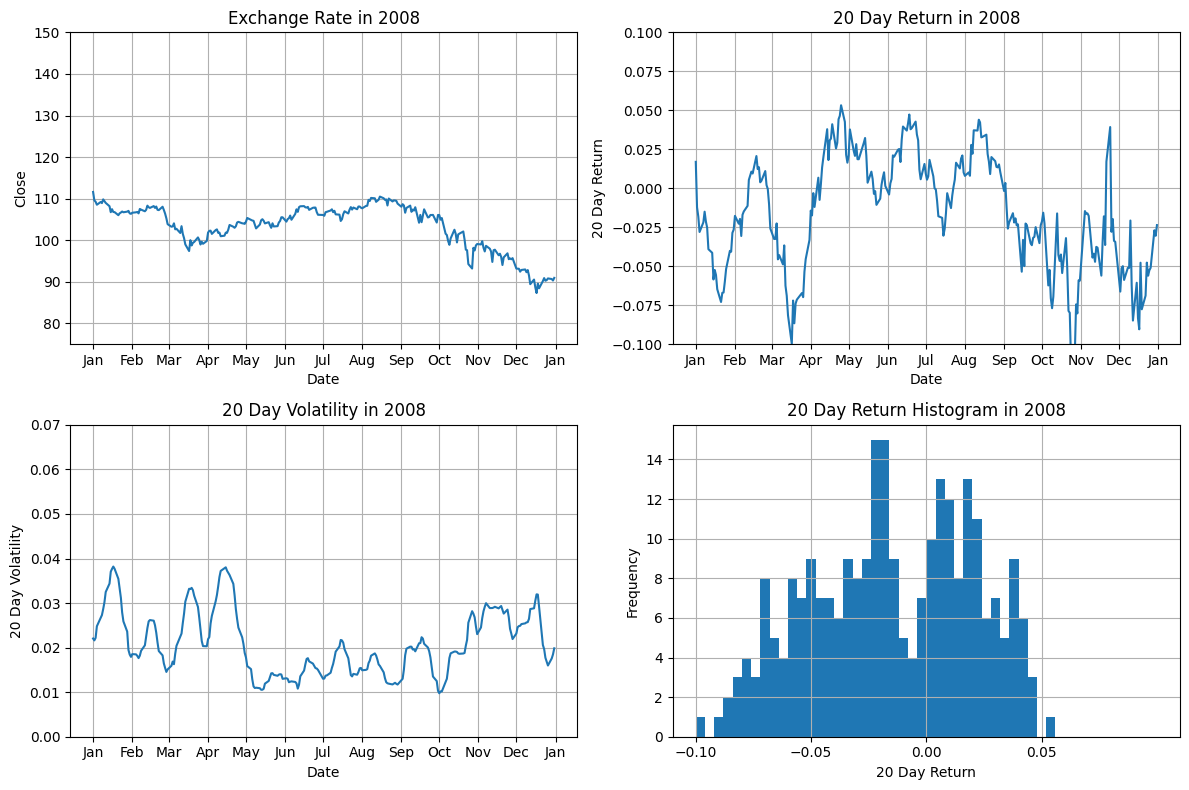

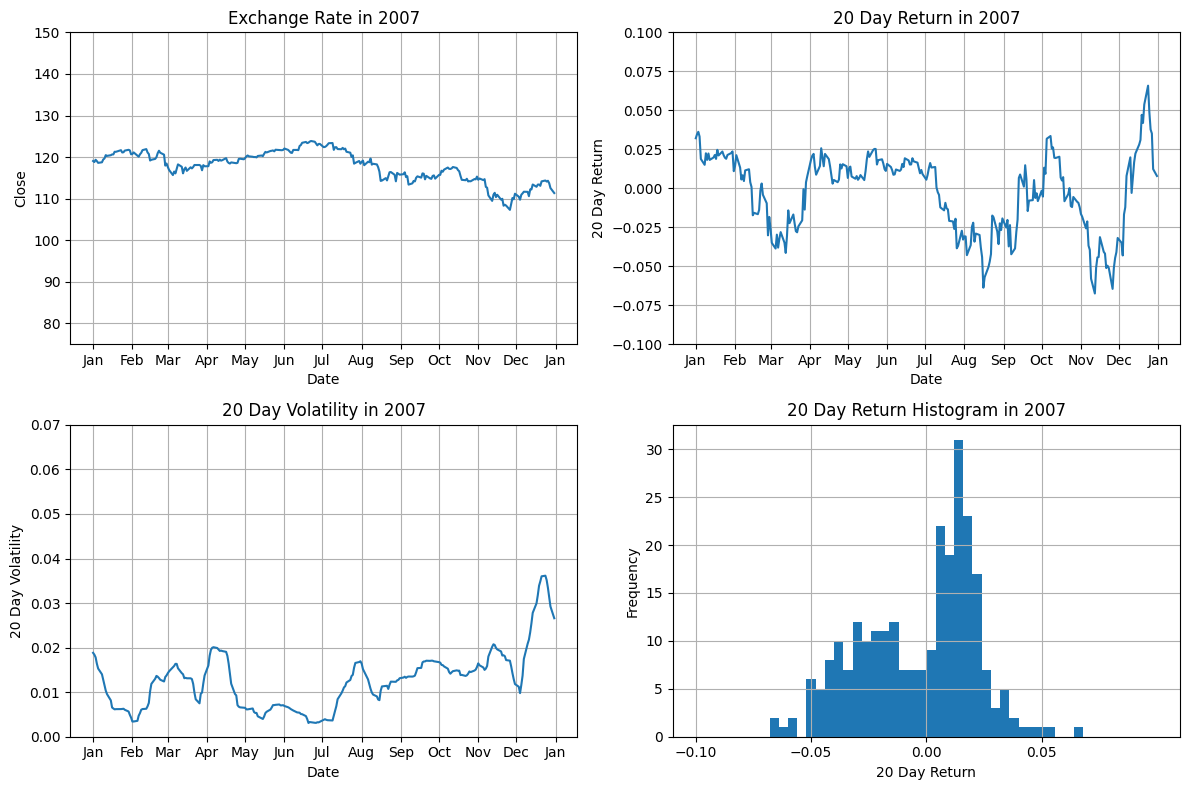

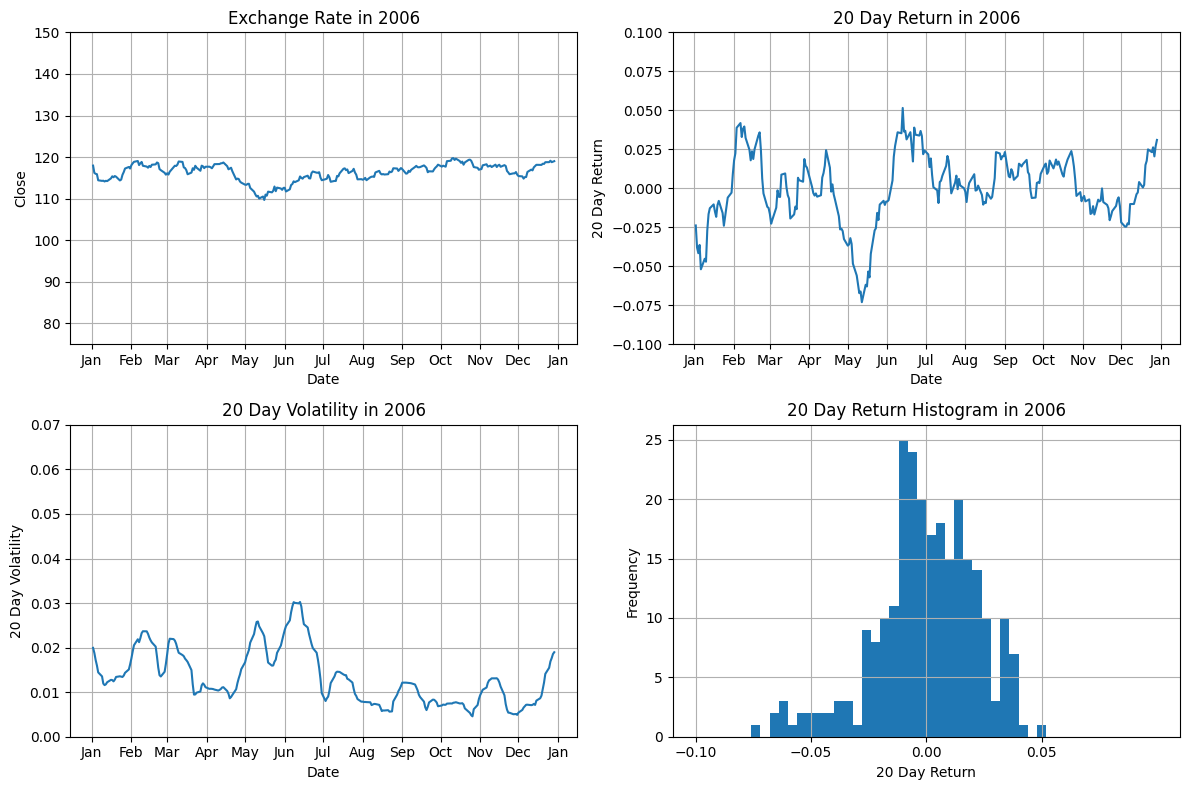

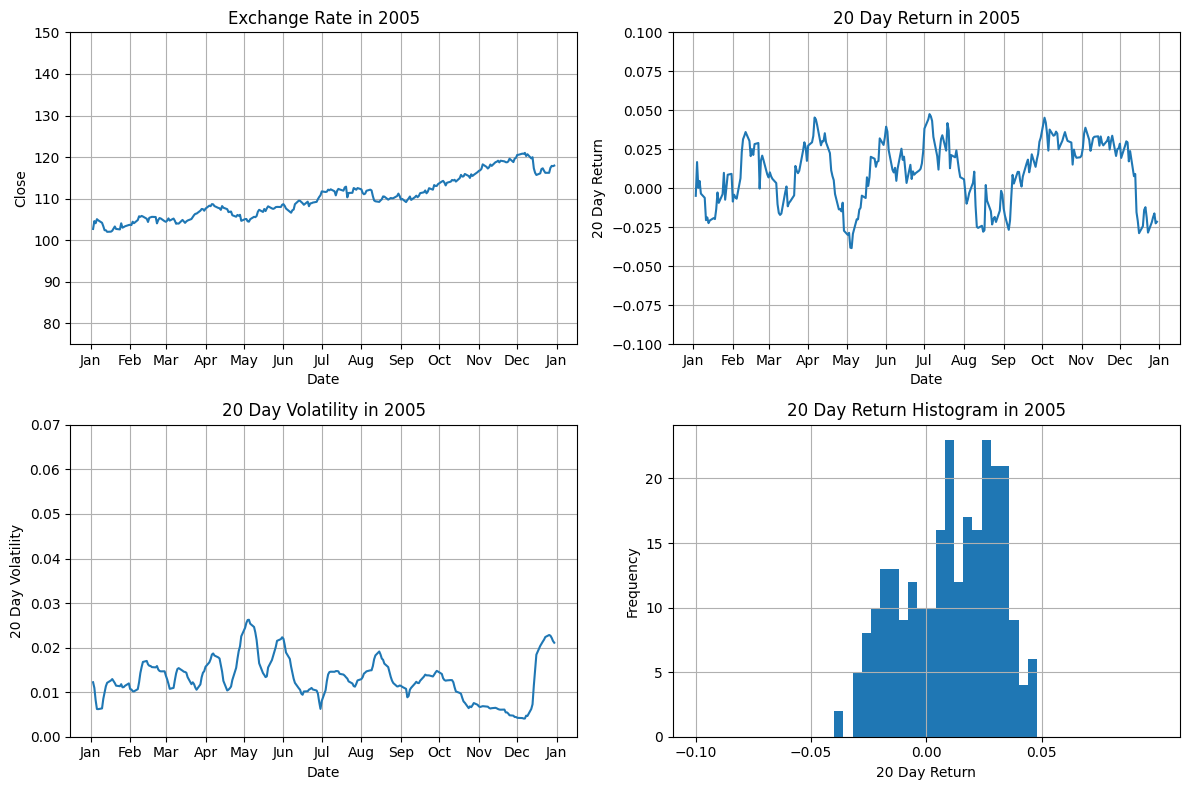

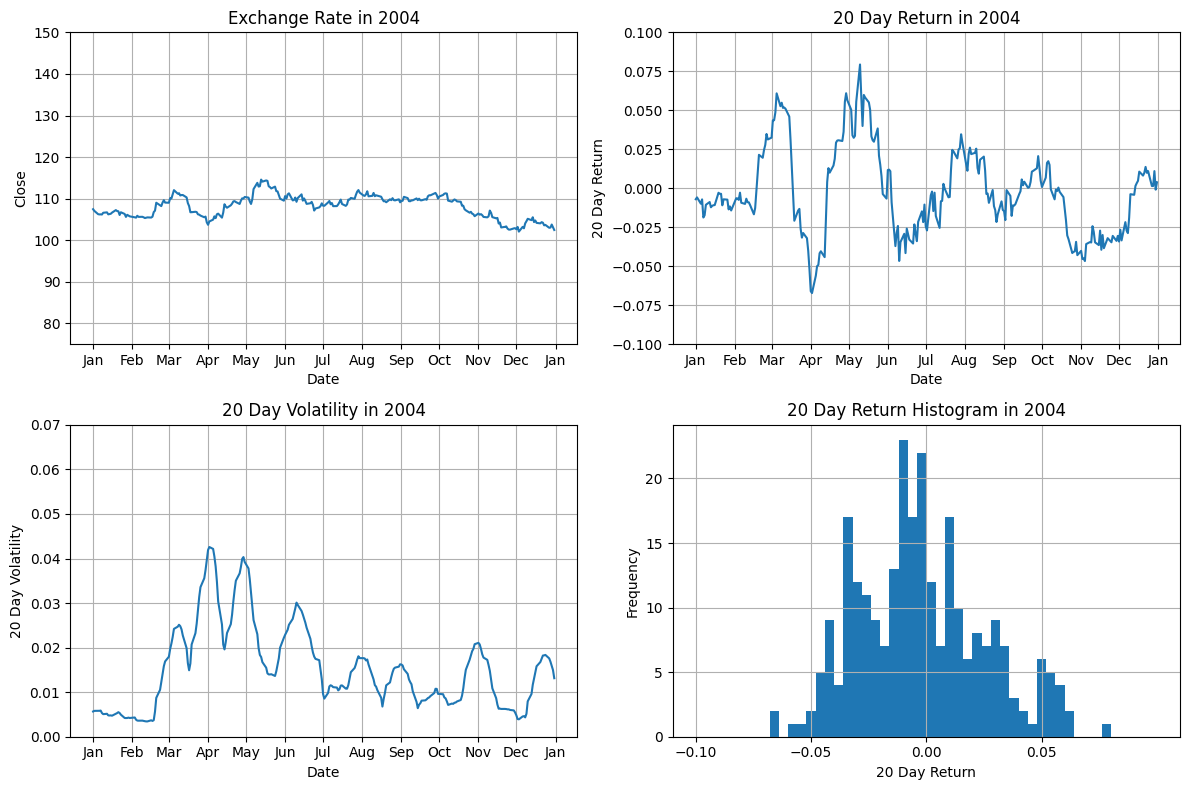

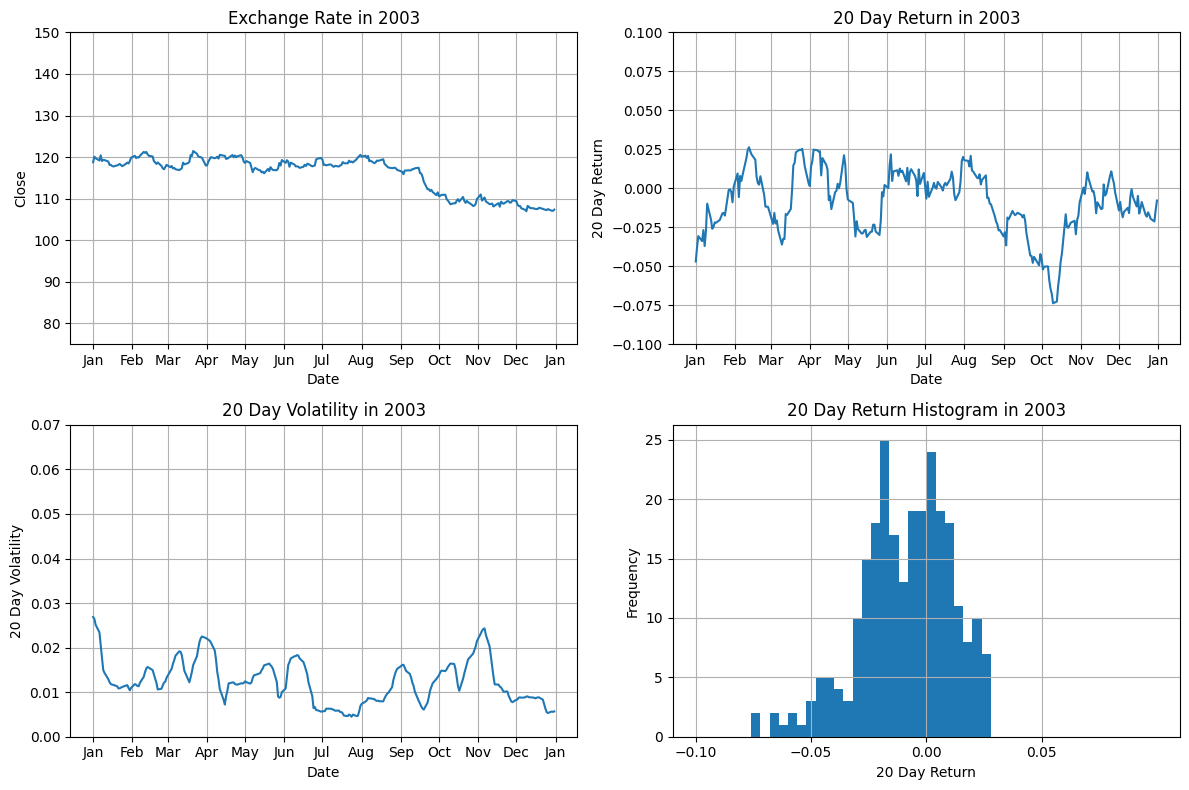

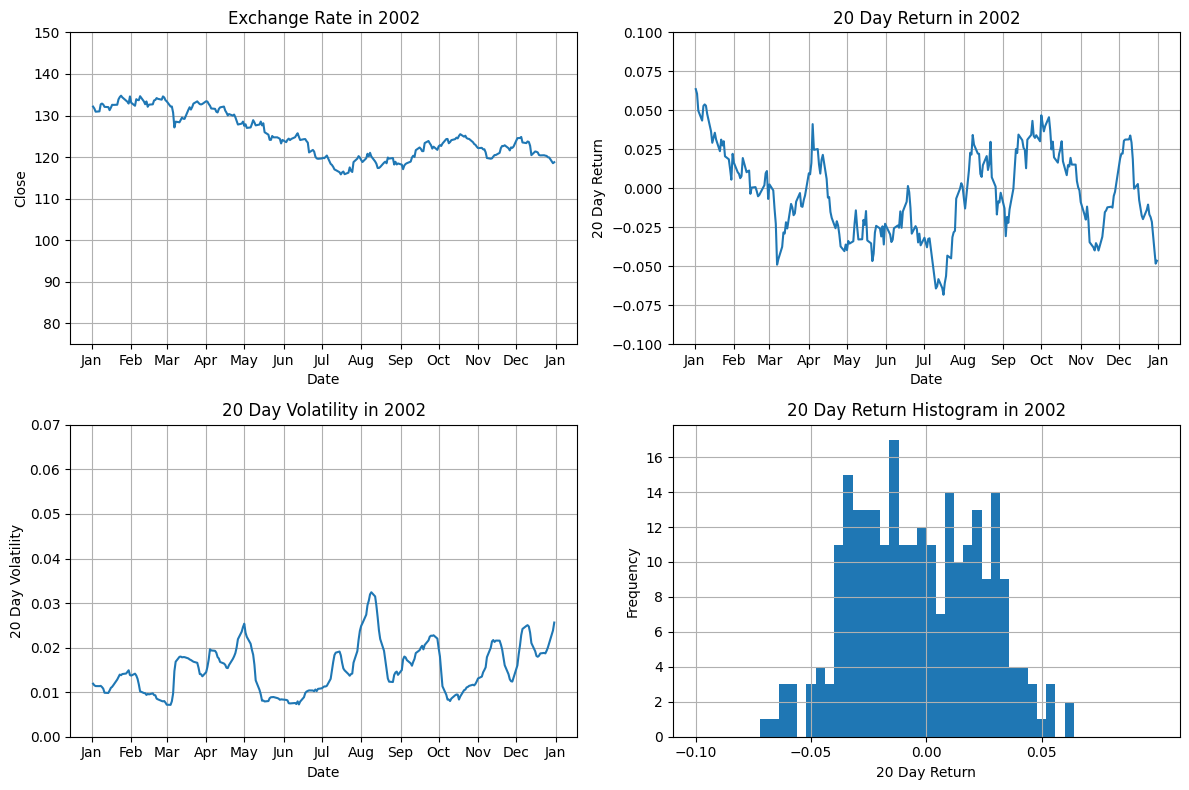

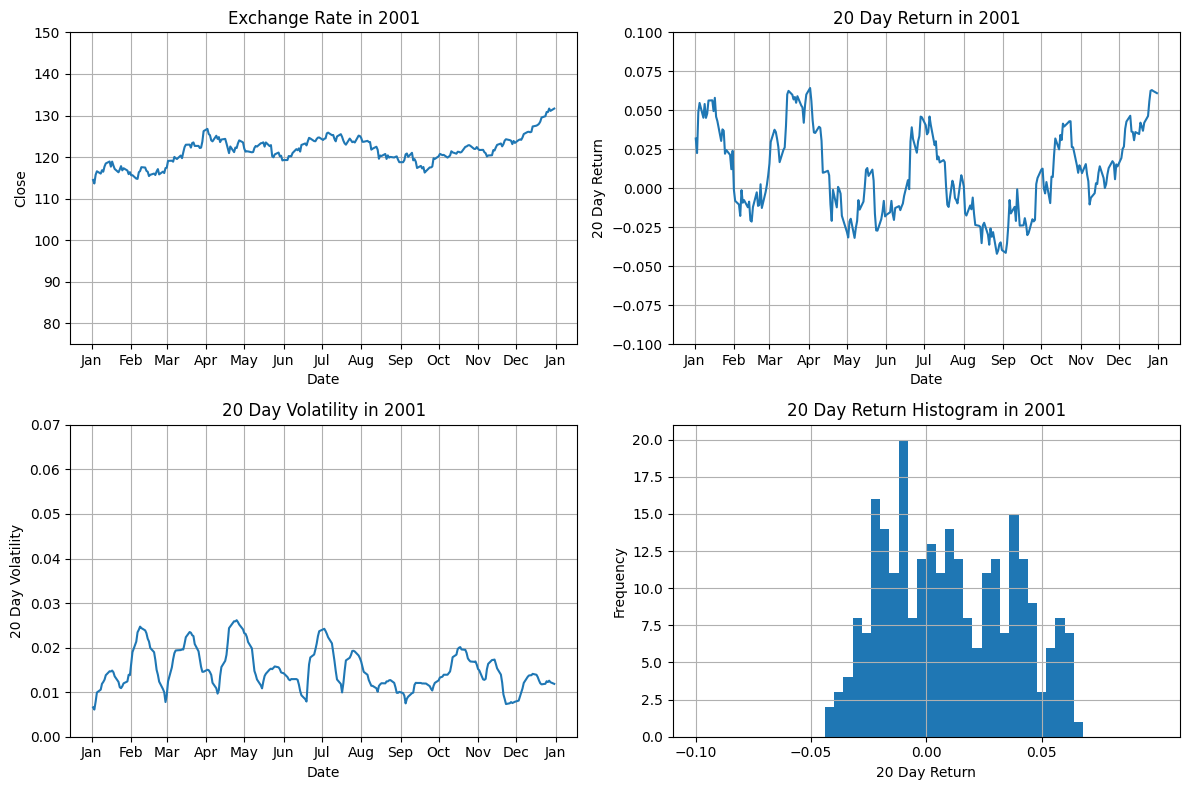

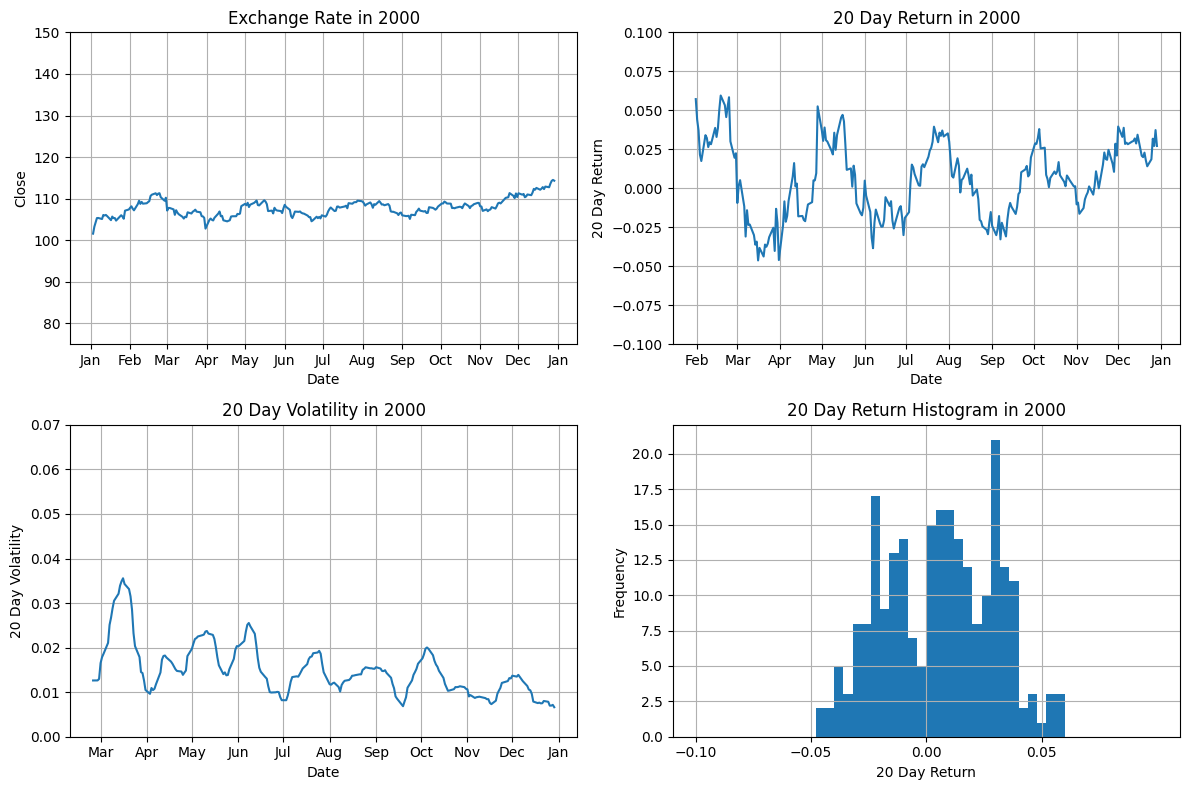

In [19]:
# 20日間リターン/ボラティリティでの分析

# 20日間リターン    
return_days = 20

# 20日間ボラティリティ
volatility_days = 20

# fx return とvolatilityの計算
calculate_and_plot_return_volatility(dir_path, csv_file_name, return_days, volatility_days)


In [1]:
!pip install nbconvert
!pip install pandoc